<h1><center> Explanatory Data Analysis </center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.ticker import AutoMinorLocator
from textwrap import wrap

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Define the path to the data file
path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Process Parameters and Properties LPBF - New.xlsx'

In [2]:
# Bold font for plots
from matplotlib import rc,rcParams
rc('font', weight='bold')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams.update({'font.size': 18})
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# Font size
f_size = 18
superscript_minus_one = "\u207B\u00B9"
# col_var = [str.replace('(um)', '(\u03BCm)') for str in col_var]
# col_var = [item.replace("(mm/s)", f"(mm s{superscript_minus_one})") for item in col_var]

# Histogram of all data

In [3]:
def read_data(f_path, variable_list):
    dataset = pd.read_excel(f_path)
    column_names = dataset.columns

    # Change treatment title - optional
    dataset.rename(columns={'Treated (HIP/Y/N)':'Treatment Information'}, inplace=True)
    dataset.rename(columns={'Cell Spacing':'Cell Spacing (um)'}, inplace=True)
    column_names = dataset.columns
    # Change (um) to correct scientific symbol
    dataset.columns = [str.replace('(um)', '(\u03BCm)') for str in column_names]
    dataset = dataset.replace(r'\s+', np.nan, regex =True)

    # Searches selected variable's index number
    col_index = []
    for i in range(len(variable_list)): 
        col_index.append(column_names.get_loc(variable_list[i]))
    # Change (um) to correct scientific symbol
    variable_list = [str.replace('(um)', '(\u03BCm)') for str in variable_list]
    #col_index.append(column_names.get_loc(variable_list[i]))
    # Converts whole dataset to df and filters necessary columns 
    dataset = dataset[dataset.columns[col_index]]

    # Replace '174PH' with '17-4PH'
    dataset.loc[dataset['Material'] == '174PH', 'Material'] = '17-4PH'
    # Replace 'MS' with '18Ni300'
    dataset.loc[dataset['Material'] == 'MS', 'Material'] = '18Ni300'
    # Replace N and NaN values for treatment information as As Built
    dataset.loc[dataset['Treatment Information'] == 'N', 'Treatment Information'] = 'As Built'
    dataset['Treatment Information'] = dataset['Treatment Information'].fillna('As Built')
    # Replace other treatment information 
    dataset['Treatment Information'] = dataset['Treatment Information'].replace(['Y', 'SR', 'y'], 'Heat Treated')

    return dataset

# Correlation Heatmaps - All Materials

In [ ]:
# Read data
df_all = pd.read_excel(path)
df_all = df_all[df_all['Material'].isin(['316L', 'IN718', 'TI6Al4V', 'AlSi10Mg'])]

# Remove white spaces on the left and right
df_all['Model'] = df_all['Model'].str.strip()
df_all['Manufacturer'] = df_all['Manufacturer'].str.strip()
# for Model, combine "ConceptLaser M2" with M2
df_all['Model'] = df_all['Model'].replace({'M2 Cusing': 'M2'})
df_all['Model'] = df_all['Model'].replace({'ConceptLaser M2': 'M2'})
df_all['Model'] = df_all['Model'].replace({'Concept Laser M2': 'M2'})
df_all['Model'] = df_all['Model'].replace({'EOS M280': 'M280'})
df_all['Model'] = df_all['Model'].replace({'EOS M290': 'M290'})
# Replace Model values with "Other" if they don't contain any digit
df_all['Model'] = df_all['Model'].apply(lambda x: "Other" if not pd.isna(x) and not any(char.isdigit() for char in str(x)) else x)

df_all

Material Author's \nLast Name    Year  \
0       IN718             Jia & Gu  2014.0   
1       IN718             Jia & Gu  2014.0   
2       IN718             Jia & Gu  2014.0   
3       IN718             Jia & Gu  2014.0   
4       IN718                   Lu  2015.0   
...       ...                  ...     ...   
4406     316L               Yildiz  2024.0   
4407     316L               Yildiz  2024.0   
4408     316L               Yildiz  2024.0   
4409     316L               Yildiz  2024.0   
4410     316L               Yildiz  2024.0   

                                          Link to paper    Manufacturer Model  \
0     https://www.sciencedirect.com/science/article/...  Self Developed   NaN   
1     https://www.sciencedirect.com/science/article/...  Self Developed   NaN   
2     https://www.sciencedirect.com/science/article/...  Self Developed   NaN   
3     https://www.sciencedirect.com/science/article/...  Self Developed   NaN   
4     https://www.sciencedirect.com/science/article/...   SLM Solutions   NaN   
...                                                 ...             ...   ...   
4406       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   
4407       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   
4408       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   
4409       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   
4410       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   

     Printing Method Method Powder Size \nDistribution (μm)  Laser Power (W)  \
0               LPBF    NaN                             NaN            110.0   
1               LPBF    NaN                             NaN            110.0   
2               LPBF    NaN                             NaN            120.0   
3               LPBF    NaN                             NaN            130.0   
4               LPBF    NaN                             NaN            180.0   
...              ...    ...                             ...              ...   
4406            LPBF    NaN                           19-48            350.0   
4407            LPBF    NaN                           19-48            100.0   
4408            LPBF    NaN                           19-48            200.0   
4409            LPBF    NaN                           19-48            350.0   
4410            LPBF    NaN                           19-48            350.0   

      ...  Test Temerature (℃).1  Stress/Strain Control  Max Stress/Strain  \
0     ...                    NaN                    NaN                NaN   
1     ...                    NaN                    NaN                NaN   
2     ...                    NaN                    NaN                NaN   
3     ...                    NaN                    NaN                NaN   
4     ...                    NaN                    NaN                NaN   
...   ...                    ...                    ...                ...   
4406  ...                    NaN                    NaN                NaN   
4407  ...                    NaN                    NaN                NaN   
4408  ...                    NaN                    NaN                NaN   
4409  ...                    NaN                    NaN                NaN   
4410  ...                    NaN                    NaN                NaN   

      R value  Fatigue Life (Cycles)  Test Temerature (℃).2  \
0         NaN                    NaN                    NaN   
1         NaN                    NaN                    NaN   
2         NaN                    NaN                    NaN   
3         NaN                    NaN                    NaN   
4         NaN                    NaN                    NaN   
...       ...                    ...                    ...   
4406      NaN                    NaN                    NaN   
4407      NaN                    NaN                    NaN   
4408      NaN 

In [5]:
# Filter out dataframe for interested materials

# Choose variables to consider (for input and output data)
input_var = [
            #  'Material',
             'Laser Power (W)',
             'Scanning Speed (mm/s)',
             'Layer Thickness (um)',
             'Hatch Spacing (um)',
             'Volumetric energy density (J/mm3)',
            #  'Model',
             'Manufacturer',
             ]

output_var = [
              # 'Material',
              'Yield Stress (MPa)',
              'Ultimate Tensile Stress (MPa)',
              'Average Work Hardening',
              'Elongation (%)',
              'Consolidation (%)',
            #   'Cell Spacing (um)',
              # 'Treatment Information'
              ]

corr_input = input_var.copy()
corr_input.remove('Manufacturer')
# # Obtains length of input and outputs
# n_inputs = len(input_var)
# n_inputs = [str.replace('(um)', '(\u03BCm)') for str in input_var]
# n_outputs = len(output_var)
# n_outputs = [str.replace('(um)', '(\u03BCm)') for str in output_var]
# input_var = [str.replace('(um)', '(\u03BCm)') for str in input_var]
# output_var = [str.replace('(um)', '(\u03BCm)') for str in output_var]

input_var 

['Laser Power (W)',
 'Scanning Speed (mm/s)',
 'Layer Thickness (um)',
 'Hatch Spacing (um)',
 'Volumetric energy density (J/mm3)',
 'Manufacturer']

In [6]:
dataset_copy = df_all.copy()
# Filter data to specified materials
materials_list = ['316L', 'IN718', 'TI6Al4V', 'AlSi10Mg']
dataset_copy = dataset_copy[dataset_copy['Material'].isin(materials_list)]
# Split data into processing parameters and properties (input and output)
x_df = dataset_copy[input_var]
y_df = dataset_copy[output_var]

# Parameters for plots
f_size = 22
pad_size = 8
txt_size = 26
box = {'facecolor': 'none',
       'edgecolor': 'black',
       'boxstyle': 'square'
      }
sns.set(style="white")

# Remove variables to plot in histogram
x_variables = x_df.columns.to_list()
# x_variables.remove('Material')
x_variables.remove('Volumetric energy density (J/mm3)')
y_variables = y_df.columns.to_list()
# y_variables.remove('Material')

In [7]:
all_df = pd.concat([x_df, y_df], axis=1)
all_df = all_df.replace(r'\s+', np.nan, regex = True)
all_df

Laser Power (W)  Scanning Speed (mm/s)  Layer Thickness (um)  \
0               110.0                  600.0                   NaN   
1               110.0                  400.0                   NaN   
2               120.0                  400.0                   NaN   
3               130.0                  400.0                   NaN   
4               180.0                  600.0                  30.0   
...               ...                    ...                   ...   
4406            350.0                 1700.0                  80.0   
4407            100.0                 1700.0                  55.0   
4408            200.0                 1700.0                  55.0   
4409            350.0                 1400.0                  55.0   
4410            350.0                 2000.0                  55.0   

      Hatch Spacing (um)  Volumetric energy density (J/mm3) Manufacturer  \
0                    NaN                                NaN          NaN   
1                    NaN                                NaN          NaN   
2                    NaN                                NaN          NaN   
3                    NaN                                NaN          NaN   
4                  150.0                                NaN          NaN   
...                  ...                                ...          ...   
4406                25.0                         102.941176          NaN   
4407                35.0                          30.557678          NaN   
4408                35.0                          61.115355          NaN   
4409                35.0                         129.870130          NaN   
4410                35.0                          90.909091          NaN   

      Yield Stress (MPa)  Ultimate Tensile Stress (MPa)  \
0                    NaN                            NaN   
1                    NaN                            NaN   
2                    NaN                            NaN   
3                    NaN                            NaN   
4                  804.0                         1076.5   
...                  ...                            ...   
4406               366.9                          523.7   
4407               137.2                          165.4   
4408               315.9                          332.2   
4409               398.8                          551.2   
4410               385.6                          526.4   

      Average Work Hardening  Elongation (%)  Consolidation (%)  
0                        NaN             NaN              74.50  
1                        NaN             NaN              87.00  
2                        NaN             NaN              92.00  
3                        NaN             NaN              98.40  
4                  16.172107           16.85              98.67  
...                      ...             ...                ...  
4406                3.266667           48.00              98.08  
4407                3.525000            8.00              80.99  
4408                1.811111            9.00              92.21  
4409                2.627586           58.00              99.27  
4410                2.607407           54.00              96.90  

[2692 rows x 11 columns]

In [8]:
def in_out_corr(df_x, df_y, input_params, output_params, method):
    all_df = pd.concat([df_x, df_y], axis=1)
    all_df = all_df.replace(r'\s+', np.nan, regex = True)
    all_df = all_df.corr(method)
    all_df = all_df.drop(index=input_params)
    all_df = all_df.drop(output_params, axis=1)
    return all_df

def corr_map(corr_matrices, vmin, vmax, step, c_palette='mako'):
    sns.set(font_scale=1.8)
    fig, axes = plt.subplots(1, 3, figsize=(30, 8), gridspec_kw={'width_ratios': [1, 1, 1]})

    for i, (corr_matrix, title) in enumerate(corr_matrices):
        cmap = sns.color_palette(c_palette, as_cmap=True)
        if i == 2:  # Only adjust color bar for the last heatmap
            heatmap = sns.heatmap(corr_matrix, center=0,
                                square=True, linewidths=.5, annot=True, fmt='.2f', cmap=cmap, ax=axes[i], vmin=vmin, vmax=vmax, cbar=True)
                                
            # Adjust color bar ticks
            cbar = heatmap.collections[0].colorbar
            cbar.set_ticks(np.arange(vmin, vmax+step, step))
        else:
            heatmap = sns.heatmap(corr_matrix, center=0,
                                square=True, linewidths=.5, annot=True, fmt='.2f', cmap=cmap, ax=axes[i], vmin=vmin, vmax=vmax, cbar=False)

        labels_x = [ '\n'.join(wrap(l, 17)) for l in corr_matrices[0][0].columns.to_list()]
        labels_y = ['\n'.join(wrap(l, 17)) for l in corr_matrices[0][0].index.to_list()]

        # Replace labels
        labels_x = [str.replace('(um)', '(\u03BCm)') for str in labels_x]
        labels_x = [item.replace("(mm/s)", "(mm $\mathregular{s^{-1}}$)") for item in labels_x]
        labels_x = [item.replace("(J/mm3)", "(J $\mathregular{mm^{-3}}$)") for item in labels_x]
    
        labels_y = [str.replace('(um)', '(\u03BCm)') for str in labels_y]
        labels_y = [item.replace("(mm/s)", "(mm $\mathregular{s^{-1}}$)") for item in labels_y]
        labels_y = [item.replace("(J/mm3)", "(J $\mathregular{mm^{-3}}$)") for item in labels_y]

        heatmap.set_xticklabels(labels_x);
        heatmap.set_yticklabels(labels_y);
        axes[i].set_xticklabels(labels_x, rotation=45)
        axes[i].set_yticklabels(labels_y, rotation=0)
        axes[i].set_title(title, fontweight='bold', pad=20)  # Setting title at the top

    plt.subplots_adjust(wspace=1)  # Adjusting the width space between subplots

    plt.tight_layout()
    plt.show()

In [9]:
def filter_printer(xdf, ydf, method, manufacturer):
    if method not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Method must be 'pearson', 'spearman', or 'kendall'.")
    if manufacturer not in xdf['Manufacturer'].unique():
        raise ValueError(f"Manufacturer '{manufacturer}' not found in the dataset.")
    # Filter based on printer brand
    filter_x_df = xdf[xdf['Manufacturer'] == manufacturer]
    filter_y_df = ydf.loc[filter_x_df.index]

    # Spearman's Correlation Coefficient
    df = pd.concat([filter_x_df, filter_y_df], axis=1)
    df = df.drop(columns=['Manufacturer'])
    df = df.corr(method)
    df = df.drop(index=corr_input)
    df = df.drop(output_var, axis=1)
    return df

pearson correlation for EOS


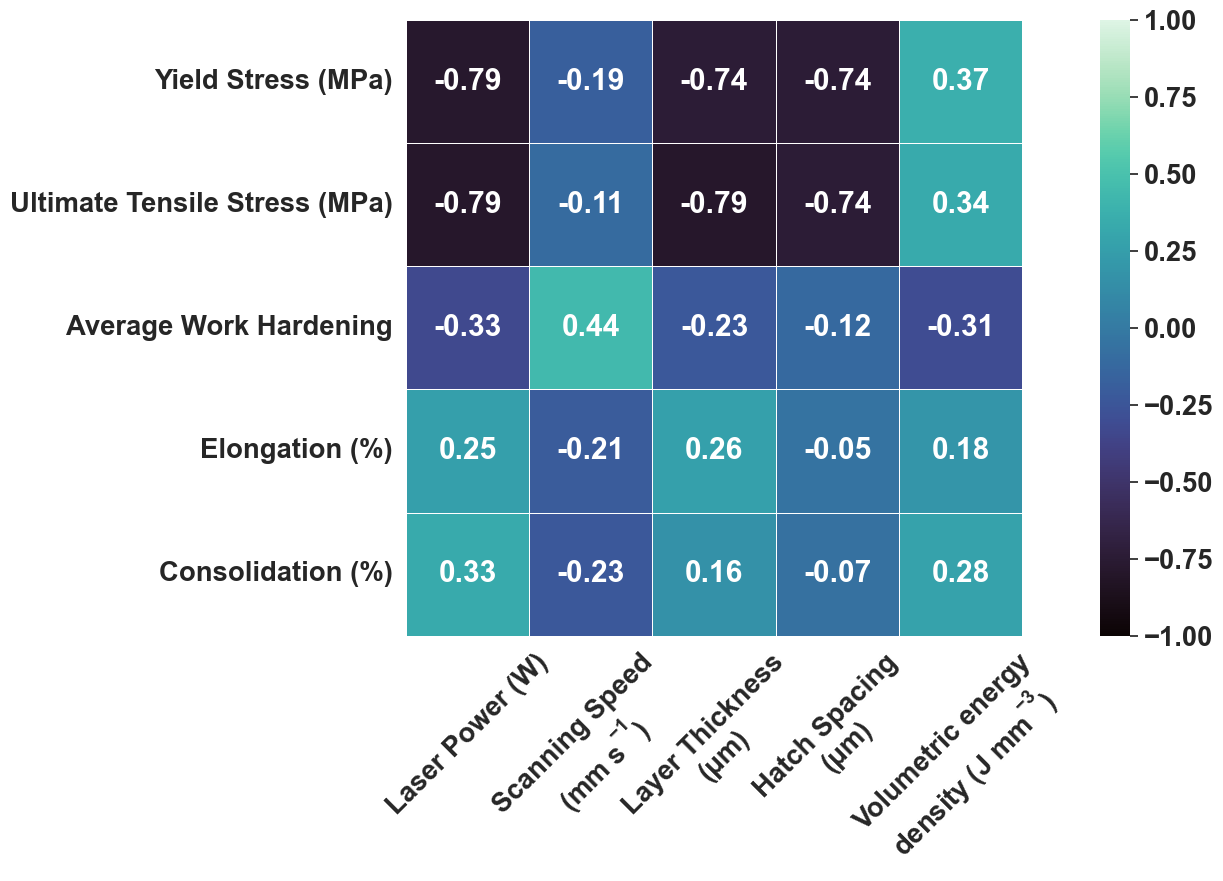

spearman correlation for EOS


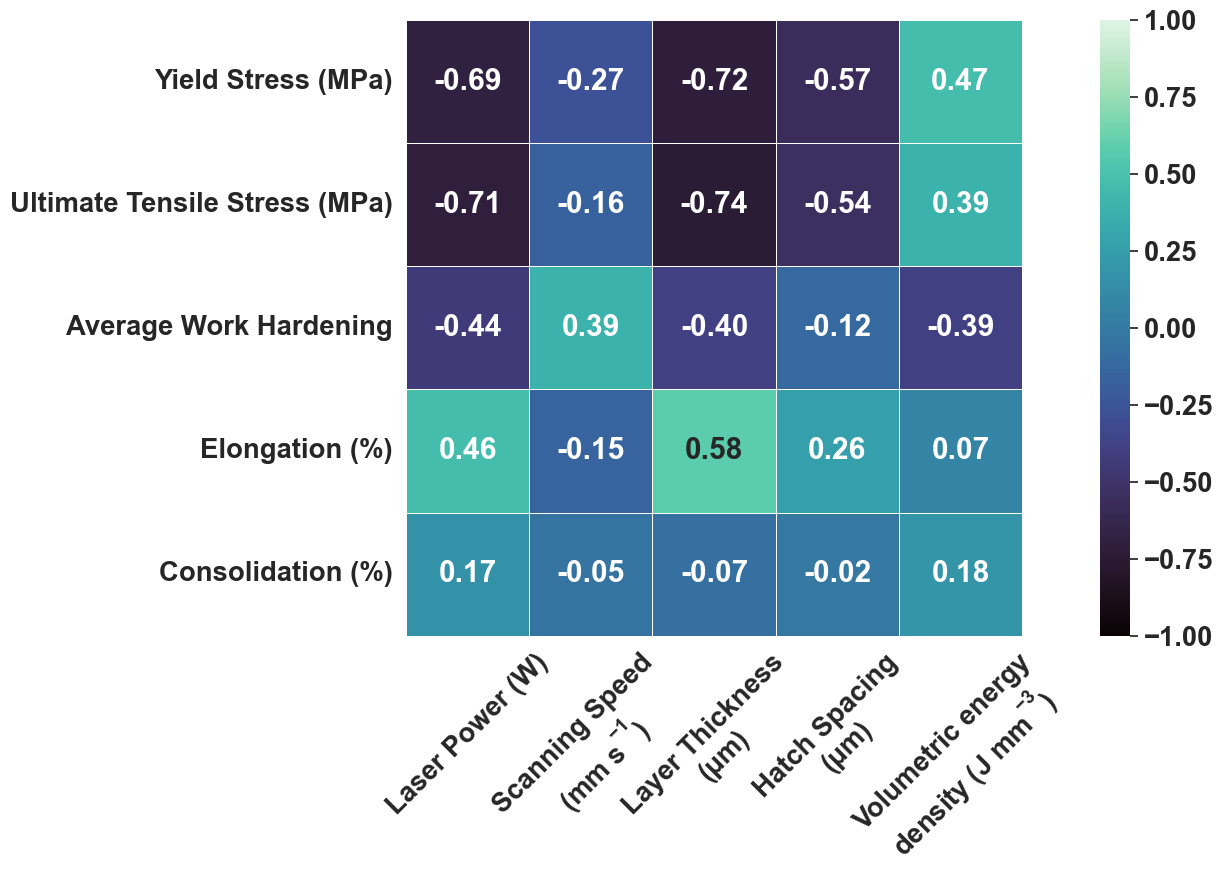

kendall correlation for EOS


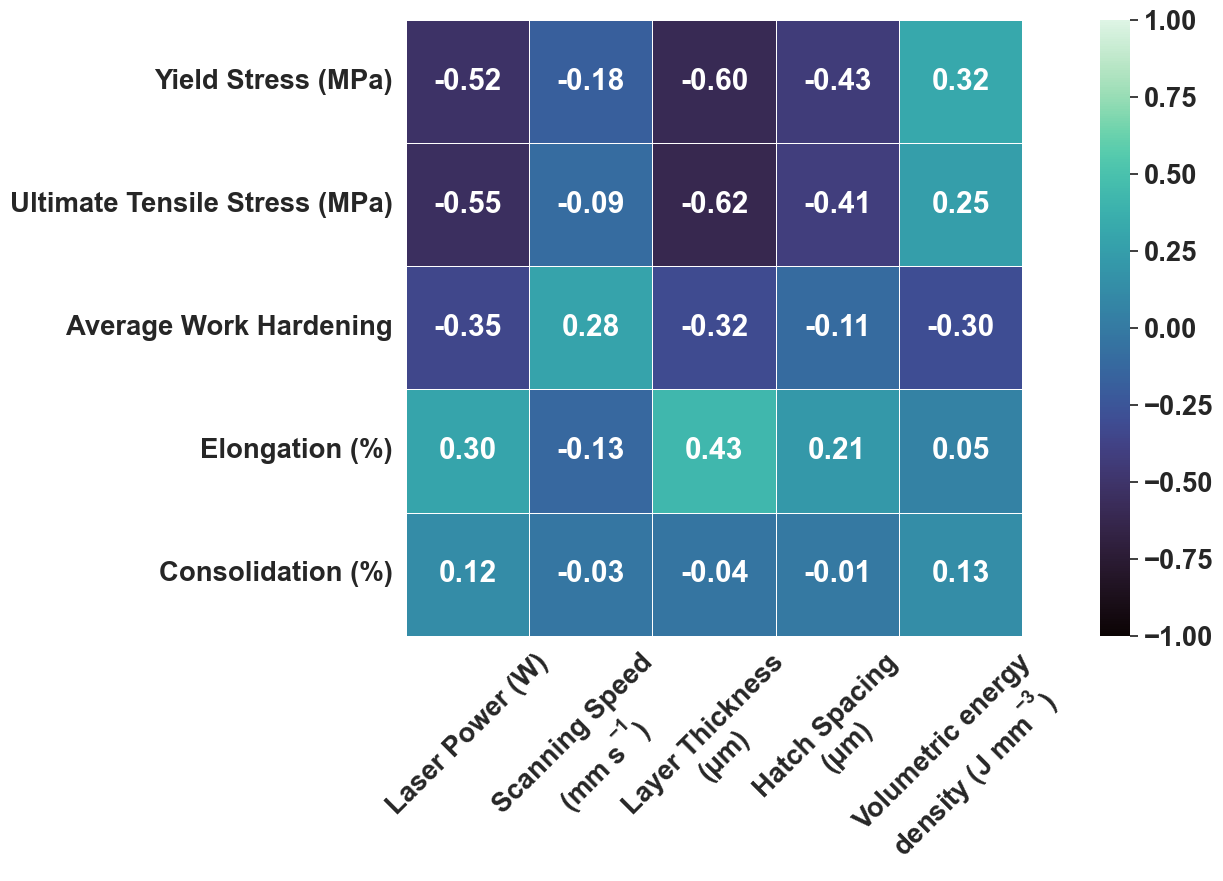

pearson correlation for SLM Solutions


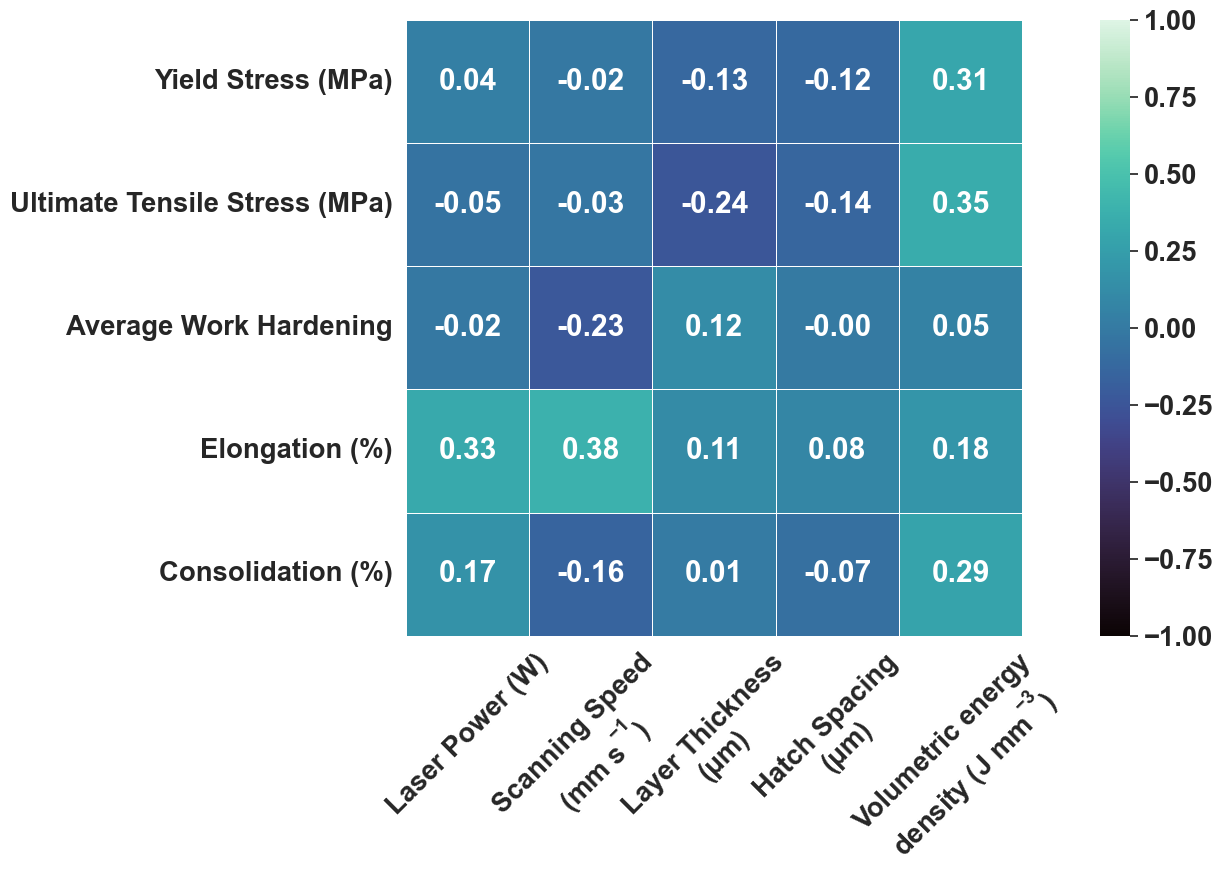

spearman correlation for SLM Solutions


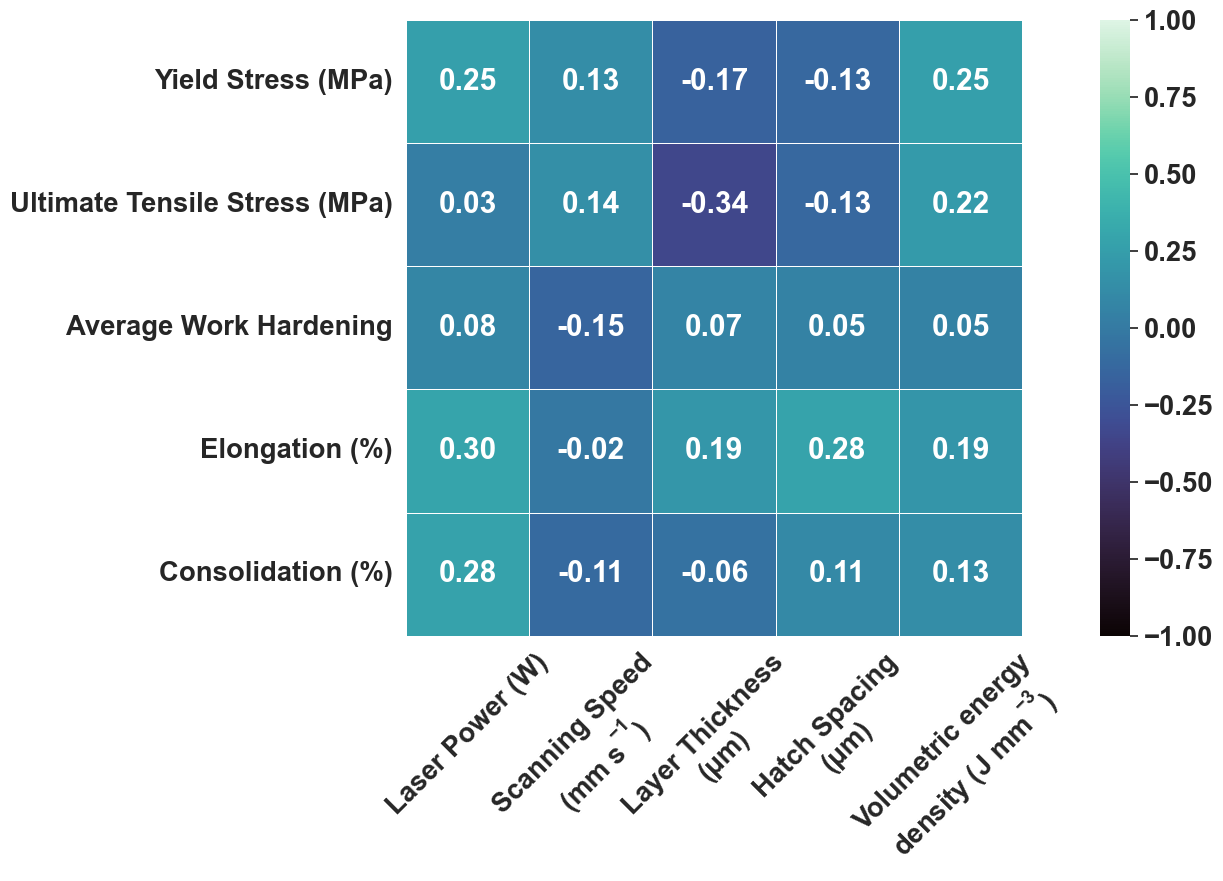

kendall correlation for SLM Solutions


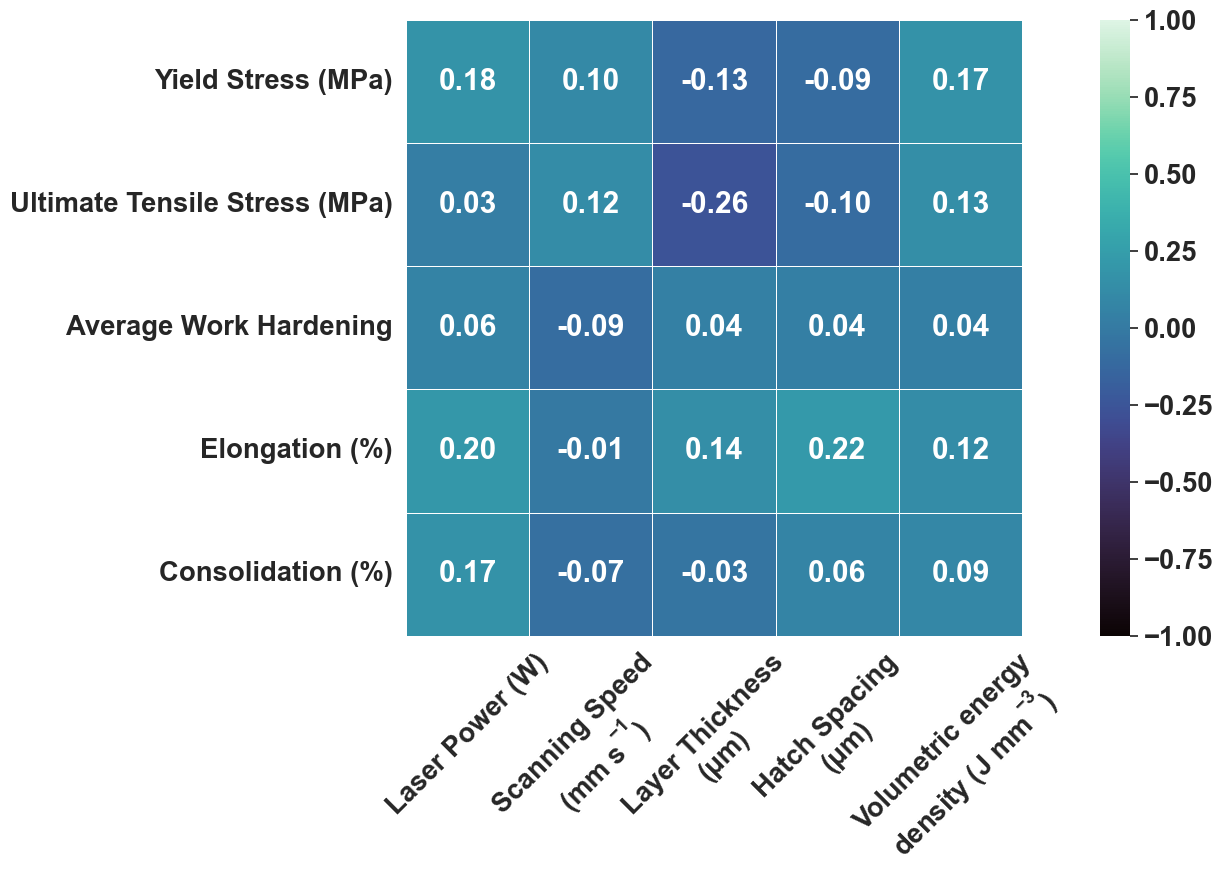

pearson correlation for Concept Laser


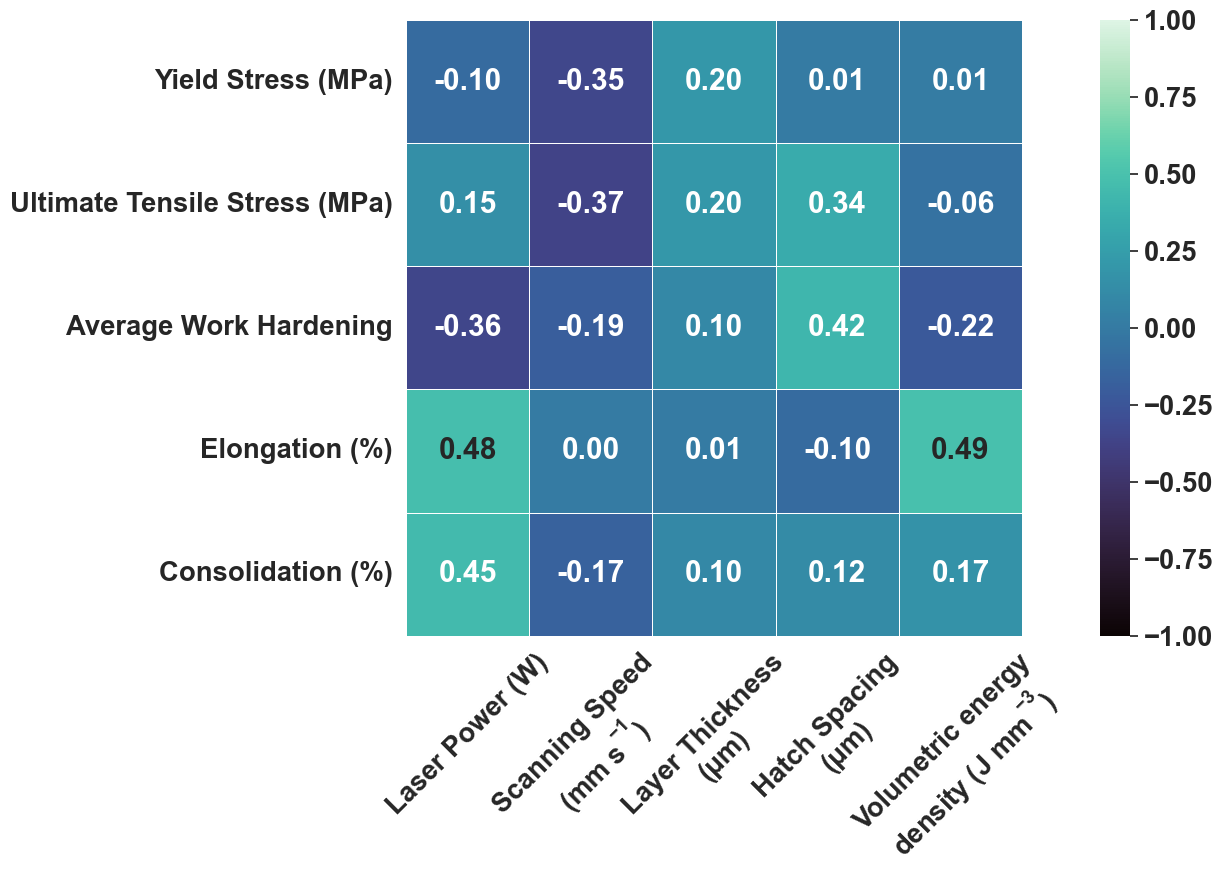

spearman correlation for Concept Laser


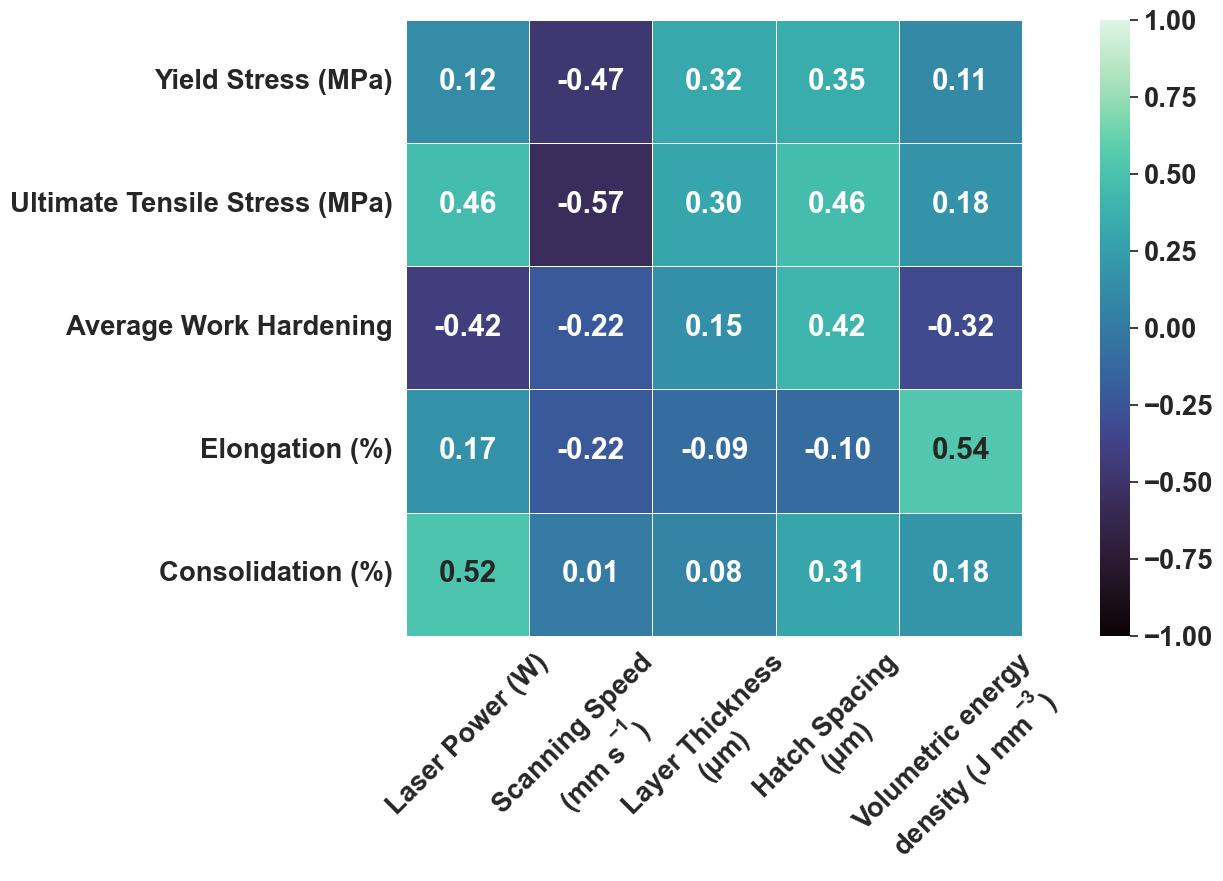

kendall correlation for Concept Laser


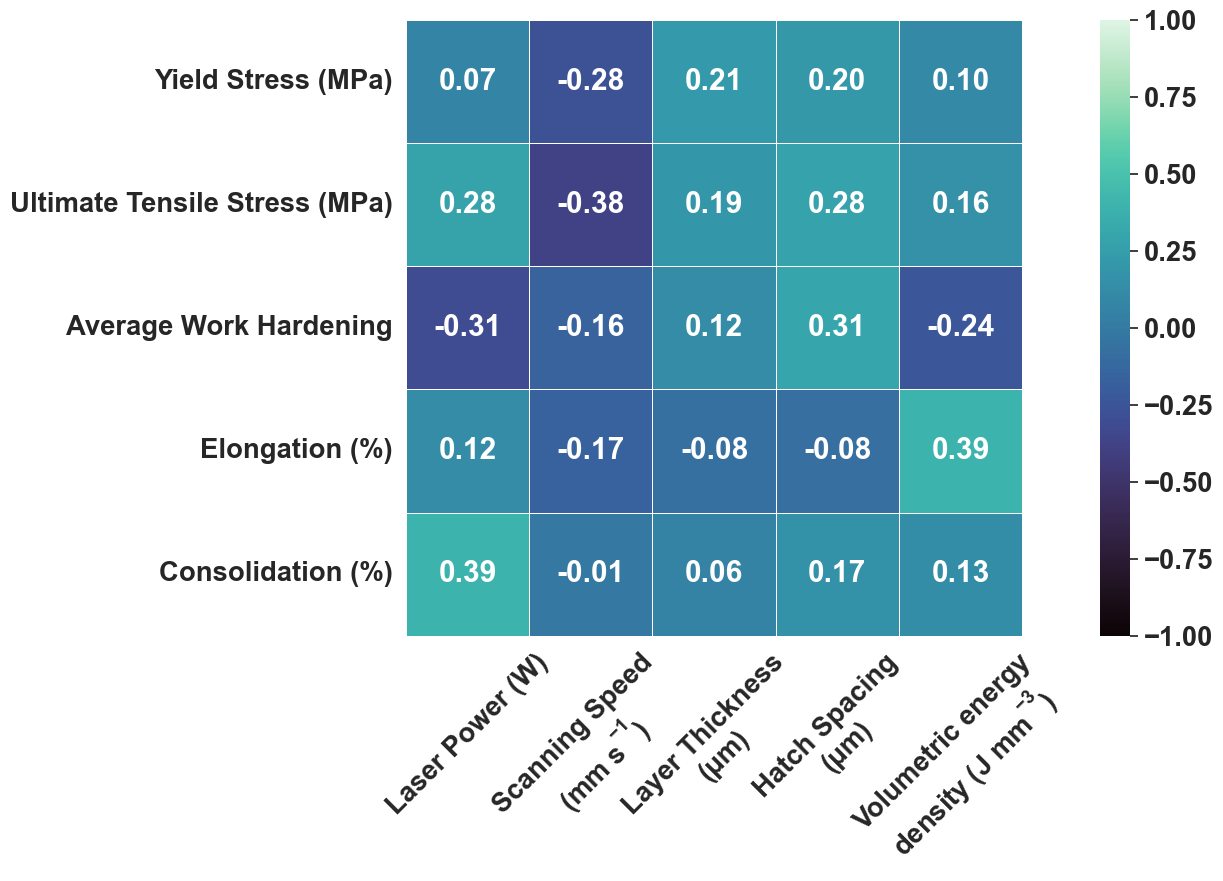

In [10]:
for i, manufacturer in enumerate(x_df['Manufacturer'].value_counts().index):
    if i == 3:
        break
    else:
        for method in ['pearson', 'spearman', 'kendall']:
            print(f"{method} correlation for {manufacturer}")
            all_df = filter_printer(x_df, y_df, method, manufacturer)

            sns.set(font_scale=1.8)
            plt.figure(figsize=(20, 8))
            cmap = sns.color_palette("mako", as_cmap=True)
            heatmap = sns.heatmap(all_df, vmin=-1, vmax=1, center=0,
                        square=True, linewidths=.5, annot=True, fmt='.2f', cmap=cmap)
            # heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)
            labels_x = [ '\n'.join(wrap(l, 17)) for l in corr_input]

            # superscript_minus_one = "\u207B\u00B9"
            labels_x = [str.replace('(um)', '(\u03BCm)') for str in labels_x]
            labels_x = [item.replace("(mm/s)", "(mm $\mathregular{s^{-1}}$)") for item in labels_x]
            labels_x = [item.replace("(J/mm3)", "(J $\mathregular{mm^{-3}}$)") for item in labels_x]

            heatmap.set_xticklabels(labels_x);
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            
            # plt.savefig(f'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper - Revision/Figures/Revision/{method}_{manufacturer}.png', bbox_inches='tight', dpi=300)
            plt.show()

In [ ]:
def corr_map(corr_matrices, vmin, vmax, step, c_palette='mako'):
    sns.set(font_scale=1.8)
    fig, axes = plt.subplots(1, 3, figsize=(30, 8), gridspec_kw={'width_ratios': [1, 1, 1.25]})

    for i, (corr_matrix, title) in enumerate(corr_matrices):
        cmap = sns.color_palette(c_palette, as_cmap=True)
        if i == 2:  # Only adjust color bar for the last heatmap
            heatmap = sns.heatmap(corr_matrix, center=0,
                                square=True, linewidths=.5, annot=True, fmt='.2f', cmap=cmap, ax=axes[i], vmin=vmin, vmax=vmax, cbar=True,
                                cbar_kws={"shrink": 1})
                                
            # Adjust color bar ticks
            cbar = heatmap.collections[0].colorbar
            cbar.set_ticks(np.arange(vmin, vmax+step, step))
        else:
            heatmap = sns.heatmap(corr_matrix, center=0,
                                square=True, linewidths=.5, annot=True, fmt='.2f', cmap=cmap, ax=axes[i], vmin=vmin, vmax=vmax, cbar=False)

        labels_x = [ '\n'.join(wrap(l, 17)) for l in corr_matrices[0][0].columns.to_list()]
        labels_y = ['\n'.join(wrap(l, 18)) for l in corr_matrices[0][0].index.to_list()]

        # Replace labels
        labels_x = [str.replace('(um)', '(\u03BCm)') for str in labels_x]
        labels_x = [item.replace("(mm/s)", "(mm $\mathregular{s^{-1}}$)") for item in labels_x]
        labels_x = [item.replace("(J/mm3)", "(J $\mathregular{mm^{-3}}$)") for item in labels_x]
    
        labels_y = [str.replace('(um)', '(\u03BCm)') for str in labels_y]
        labels_y = [item.replace("(mm/s)", "(mm $\mathregular{s^{-1}}$)") for item in labels_y]
        labels_y = [item.replace("(J/mm3)", "(J $\mathregular{mm^{-3}}$)") for item in labels_y]

        heatmap.set_xticklabels(labels_x);
        heatmap.set_yticklabels(labels_y);
        axes[i].set_xticklabels(labels_x, rotation=45)
        axes[i].set_yticklabels(labels_y, rotation=0)
        axes[i].set_title(title, fontweight='bold', pad=20, fontsize=30)  # Setting title at the top

    plt.subplots_adjust(wspace=1)  # Adjusting the width space between subplots

    plt.tight_layout()
    # plt.savefig(f'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper - Revision/Figures/Revision/corr_{manufacturer}.png', bbox_inches='tight', dpi=300)
    plt.show()



def corr_map(corr_matrices, vmin, vmax, step, c_palette='mako'):
    sns.set(font_scale=1.8)
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 1]})

    for i, (corr_matrix, title) in enumerate(corr_matrices):
        cmap = sns.color_palette(c_palette, as_cmap=True)
        if i == 1:  # Only adjust color bar for the last heatmap
            heatmap = sns.heatmap(corr_matrix, center=0,
                                square=True, linewidths=.5, annot=True, fmt='.2f', cmap=cmap, ax=axes[i], vmin=vmin, vmax=vmax, cbar=True,
                                cbar_kws={"shrink": 0.97})
                                
            # Adjust color bar ticks
            cbar = heatmap.collections[0].colorbar
            cbar.set_ticks(np.arange(vmin, vmax+step, step))
        else:
            heatmap = sns.heatmap(corr_matrix, center=0,
                                square=True, linewidths=.5, annot=True, fmt='.2f', cmap=cmap, ax=axes[i], vmin=vmin, vmax=vmax, cbar=False)

        labels_x = [ '\n'.join(wrap(l, 17)) for l in corr_matrices[0][0].columns.to_list()]
        labels_y = ['\n'.join(wrap(l, 18)) for l in corr_matrices[0][0].index.to_list()]

        # Replace labels
        labels_x = [str.replace('(um)', '(\u03BCm)') for str in labels_x]
        labels_x = [item.replace("(mm/s)", "(mm $\mathregular{s^{-1}}$)") for item in labels_x]
        labels_x = [item.replace("(J/mm3)", "(J $\mathregular{mm^{-3}}$)") for item in labels_x]
    
        labels_y = [str.replace('(um)', '(\u03BCm)') for str in labels_y]
        labels_y = [item.replace("(mm/s)", "(mm $\mathregular{s^{-1}}$)") for item in labels_y]
        labels_y = [item.replace("(J/mm3)", "(J $\mathregular{mm^{-3}}$)") for item in labels_y]

        heatmap.set_xticklabels(labels_x);
        heatmap.set_yticklabels(labels_y);
        axes[i].set_xticklabels(labels_x, rotation=45)
        axes[i].set_yticklabels(labels_y, rotation=0)
        axes[i].set_title(title, fontweight='bold', pad=20, fontsize=30)  # Setting title at the top

    plt.subplots_adjust(wspace=1)  # Adjusting the width space between subplots

    plt.tight_layout()
    # plt.savefig(f'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper - Revision/Figures/Revision/corr_{manufacturer}.png', bbox_inches='tight', dpi=300)
    plt.show()

In [12]:
print(f"Top 3 manufacturers: {x_df['Manufacturer'].value_counts().index[:3]}")

Top 3 manufacturers: Index(['EOS', 'SLM Solutions', 'Concept Laser'], dtype='object', name='Manufacturer')


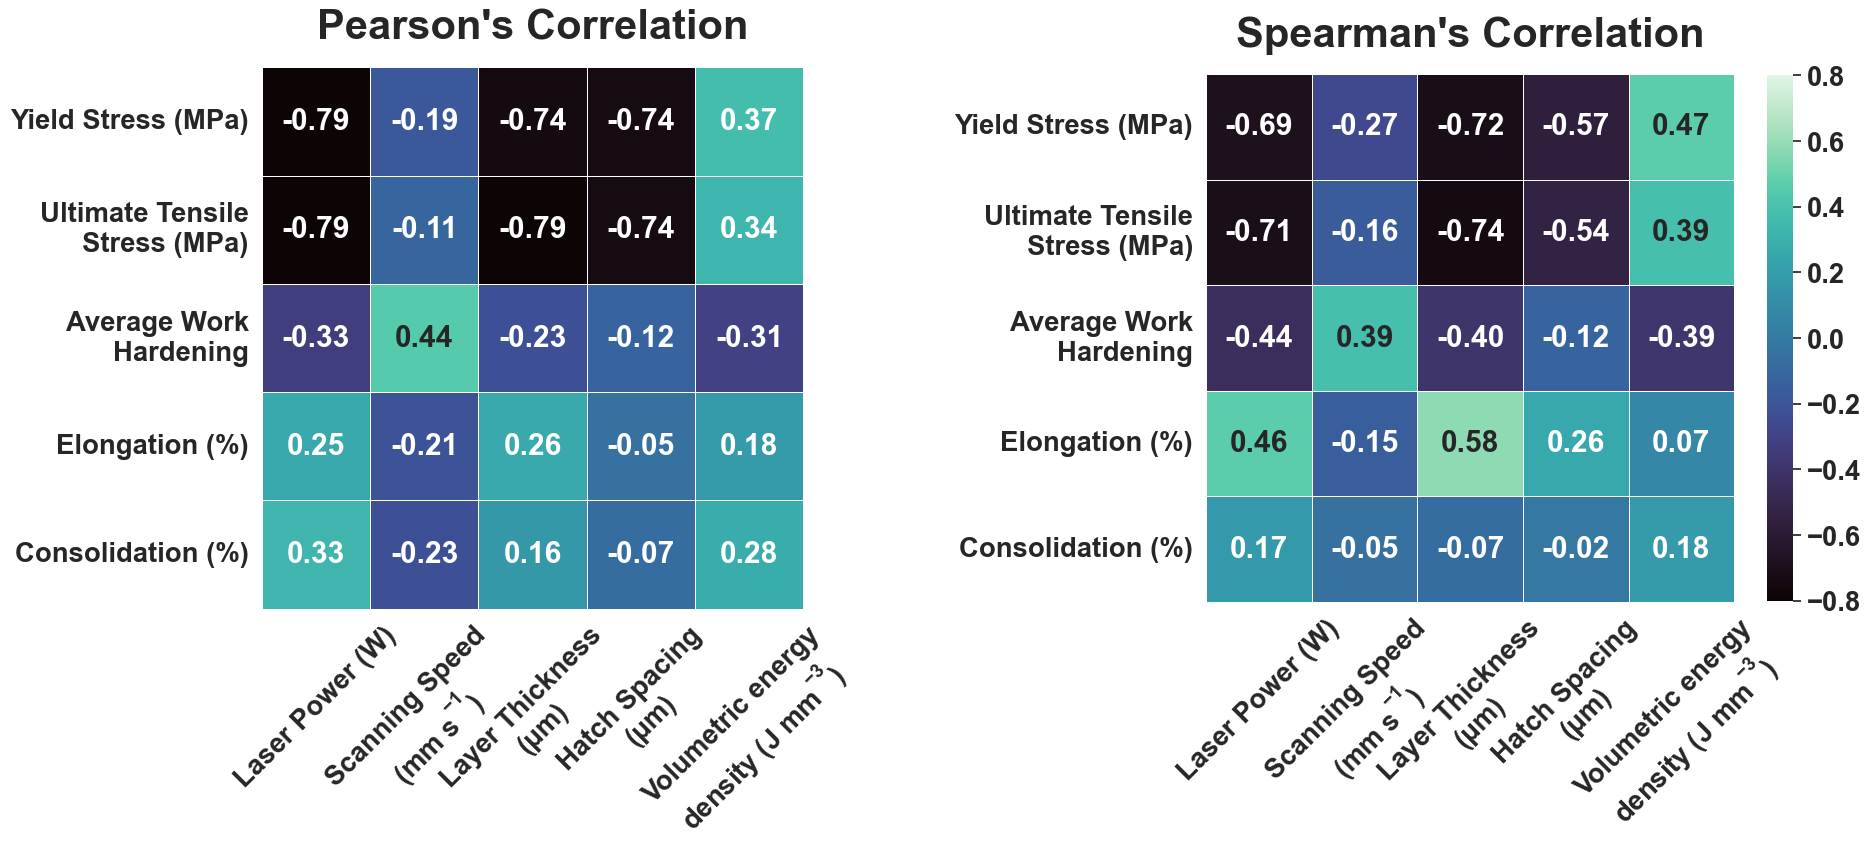

In [13]:
# Plot all 3 correlations together
manufacturer = 'EOS'
pearson_corr = filter_printer(x_df, y_df, 'pearson', manufacturer)
spearman_corr = filter_printer(x_df, y_df, 'spearman', manufacturer)
kendall_corr = filter_printer(x_df, y_df, 'kendall', manufacturer)

# List of correlation matrices and their titles
correlation_matrices = [(pearson_corr, "Pearson's Correlation"),
                        (spearman_corr, "Spearman's Correlation")]
                        # ,
                        # (kendall_corr, "Kendall's Tau Correlation")]

corr_map(corr_matrices=correlation_matrices, vmin=-0.8, vmax=0.8, step=0.2, c_palette='mako')

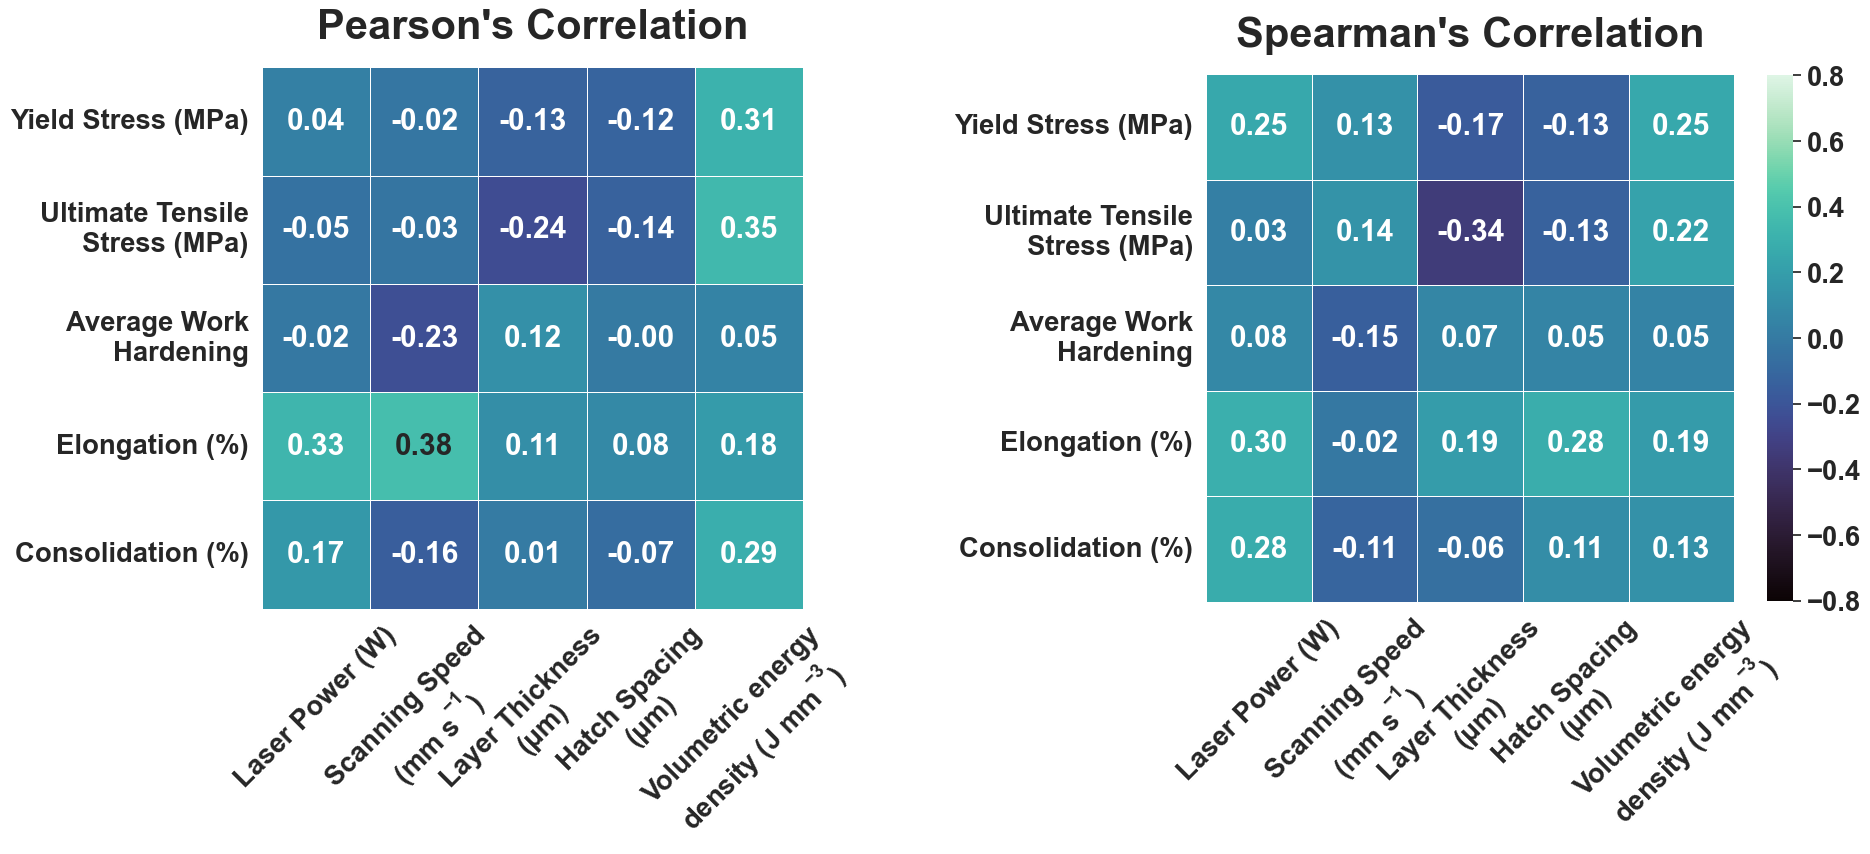

In [14]:
# Plot all 3 correlations together
manufacturer = 'SLM Solutions'
pearson_corr = filter_printer(x_df, y_df, 'pearson', manufacturer)
spearman_corr = filter_printer(x_df, y_df, 'spearman', manufacturer)
kendall_corr = filter_printer(x_df, y_df, 'kendall', manufacturer)

# List of correlation matrices and their titles
correlation_matrices = [(pearson_corr, "Pearson's Correlation"),
                        (spearman_corr, "Spearman's Correlation")]
                        # ,
                        # (kendall_corr, "Kendall's Tau Correlation")]

corr_map(corr_matrices=correlation_matrices, vmin=-0.8, vmax=0.8, step=0.2, c_palette='mako')

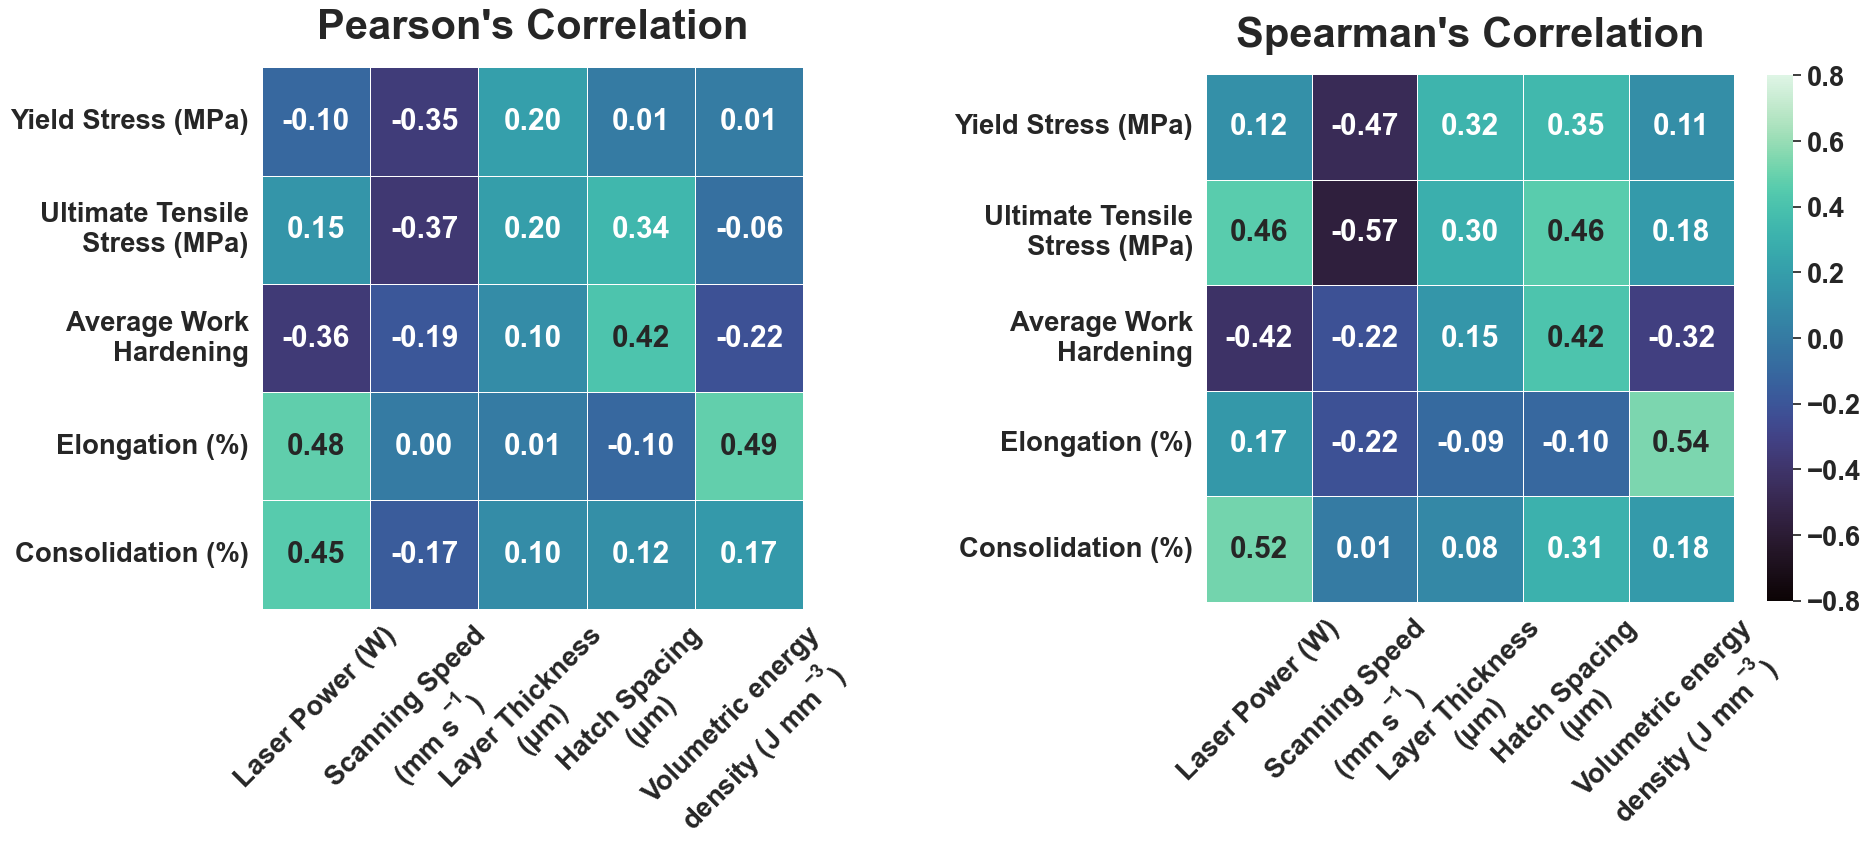

In [15]:
# Plot all 3 correlations together
manufacturer = 'Concept Laser'
pearson_corr = filter_printer(x_df, y_df, 'pearson', manufacturer)
spearman_corr = filter_printer(x_df, y_df, 'spearman', manufacturer)
kendall_corr = filter_printer(x_df, y_df, 'kendall', manufacturer)

# List of correlation matrices and their titles
correlation_matrices = [(pearson_corr, "Pearson's Correlation"),
                        (spearman_corr, "Spearman's Correlation")]
                        # ,
                        # (kendall_corr, "Kendall's Tau Correlation")]

corr_map(corr_matrices=correlation_matrices, vmin=-0.8, vmax=0.8, step=0.2, c_palette='mako')

# Variation Inflation Factor

In [ ]:
# Specify list of variables we want in our dataframe
col_var = ['Material',
            'Laser Power (W)',
            'Scanning Speed (mm/s)',
            'Layer Thickness (um)',
            'Hatch Spacing (um)',
            'Beam size (um)',
            'Volumetric energy density (J/mm3)',
            'Treatment Information',
            'Yield Stress (MPa)',
            'Ultimate Tensile Stress (MPa)', 
            'Elongation (%)',
            'Consolidation (%)',
            # 'Cell Spacing (um)',
            'Fatigue Life (Cycles)',
            'Creep Life (h)',
            'Average Work Hardening'
            ]

# Read data again 
dataset = read_data(path, col_var)
dataset

Material  Laser Power (W)  Scanning Speed (mm/s)  Layer Thickness (μm)  \
0       IN718            110.0                  600.0                   NaN   
1       IN718            110.0                  400.0                   NaN   
2       IN718            120.0                  400.0                   NaN   
3       IN718            130.0                  400.0                   NaN   
4       IN718            180.0                  600.0                  30.0   
...       ...              ...                    ...                   ...   
4406     316L            350.0                 1700.0                  80.0   
4407     316L            100.0                 1700.0                  55.0   
4408     316L            200.0                 1700.0                  55.0   
4409     316L            350.0                 1400.0                  55.0   
4410     316L            350.0                 2000.0                  55.0   

      Hatch Spacing (μm)  Beam size (μm)  Volumetric energy density (J/mm3)  \
0                    NaN            70.0                                NaN   
1                    NaN            70.0                                NaN   
2                    NaN            70.0                                NaN   
3                    NaN            70.0                                NaN   
4                  150.0             NaN                                NaN   
...                  ...             ...                                ...   
4406                25.0             NaN                         102.941176   
4407                35.0             NaN                          30.557678   
4408                35.0             NaN                          61.115355   
4409                35.0             NaN                         129.870130   
4410                35.0             NaN                          90.909091   

     Treatment Information  Yield Stress (MPa)  Ultimate Tensile Stress (MPa)  \
0                 As Built                 NaN                            NaN   
1                 As Built                 NaN                            NaN   
2                 As Built                 NaN                            NaN   
3                 As Built                 NaN                            NaN   
4                 As Built               804.0                         1076.5   
...                    ...                 ...                            ...   
4406              As Built               366.9                          523.7   
4407              As Built               137.2                          165.4   
4408              As Built               315.9                          332.2   
4409              As Built               398.8                          551.2   
4410              As Built               385.6                          526.4   

      Elongation (%)  Consolidation (%) Fatigue Life (Cycles)  Creep Life (h)  \
0                NaN              74.50                   NaN             NaN   
1                NaN              87.00                   NaN             NaN   
2                NaN              92.00                   NaN             NaN   
3                NaN              98.40                   NaN             NaN   
4              16.85              98.67                   NaN             NaN   
...              ...                ...                   ...             ...   
4406           48.00              98.08                   NaN             NaN   
4407            8.00              80.99                   NaN             NaN   
4408            9.00              92.21                   NaN             NaN   
4409           58.00              99.27                   NaN             NaN   
4410           54.00              96.90                   NaN             NaN   

      Average Work Hardening  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4     

In [17]:
# Choose variables to consider (for input and output data)
input_var = ['Material',
             'Laser Power (W)',
             'Scanning Speed (mm/s)',
             'Layer Thickness (um)',
             'Hatch Spacing (um)',
             'Volumetric energy density (J/mm3)']

output_var = ['Material',
              'Yield Stress (MPa)',
              'Ultimate Tensile Stress (MPa)',
              'Average Work Hardening',
              'Elongation (%)',
              'Consolidation (%)',
            #   'Cell Spacing (um)',
              'Treatment Information']

# Obtains length of input and outputs
n_inputs = len(input_var)
n_inputs = [str.replace('(um)', '(\u03BCm)') for str in input_var]
n_outputs = len(output_var)
n_outputs = [str.replace('(um)', '(\u03BCm)') for str in output_var]
input_var = [str.replace('(um)', '(\u03BCm)') for str in input_var]
output_var = [str.replace('(um)', '(\u03BCm)') for str in output_var]

input_var 

['Material',
 'Laser Power (W)',
 'Scanning Speed (mm/s)',
 'Layer Thickness (μm)',
 'Hatch Spacing (μm)',
 'Volumetric energy density (J/mm3)']

In [18]:
dataset_copy = dataset.copy()
# Filter data to specified materials
materials_list = ['316L', 'IN718', 'TI6Al4V', 'AlSi10Mg']
dataset_copy = dataset_copy[dataset_copy['Material'].isin(materials_list)]
dataset_copy = dataset_copy.reset_index(drop=True)
# Split data into processing parameters and properties (input and output)
x_df = dataset_copy[input_var]

# Remove variables to plot in histogram
x_variables = x_df.columns.to_list()
# x_variables.remove('Material')
x_variables.remove('Volumetric energy density (J/mm3)')

In [19]:
vif = pd.DataFrame()

vif_df = x_df.copy()
vif_df = vif_df.drop(['Material','Volumetric energy density (J/mm3)'], axis=1)
vif_df = vif_df.dropna()

vif["Variables"] = vif_df.columns
vif["VIF"] = [variance_inflation_factor(vif_df.values, i) 
               for i in range(vif_df.shape[1])]

vif

Variables       VIF
0        Laser Power (W)  4.802725
1  Scanning Speed (mm/s)  3.031374
2   Layer Thickness (μm)  4.210077
3     Hatch Spacing (μm)  4.308281

# Check Influence of Printer

In [20]:
sns.set_style("white")
sns.set_style("ticks")
# plt.rcParams['axes.grid'] = False

In [ ]:
# Read data again
df_all = pd.read_excel(path)
df_all = df_all[df_all['Material'].isin(['316L', 'IN718', 'TI6Al4V', 'AlSi10Mg'])]

# Remove white spaces on the left and right
df_all['Model'] = df_all['Model'].str.strip()
df_all['Manufacturer'] = df_all['Manufacturer'].str.strip()
# for Model, combine "ConceptLaser M2" with M2
df_all['Model'] = df_all['Model'].replace({'M2 Cusing': 'M2'})
df_all['Model'] = df_all['Model'].replace({'ConceptLaser M2': 'M2'})
df_all['Model'] = df_all['Model'].replace({'Concept Laser M2': 'M2'})
df_all['Model'] = df_all['Model'].replace({'EOS M280': 'M280'})
df_all['Model'] = df_all['Model'].replace({'EOS M290': 'M290'})
# Replace Model values with "Other" if they don't contain any digit
df_all['Model'] = df_all['Model'].apply(lambda x: "Other" if not pd.isna(x) and not any(char.isdigit() for char in str(x)) else x)

df_all

Material Author's \nLast Name    Year  \
0       IN718             Jia & Gu  2014.0   
1       IN718             Jia & Gu  2014.0   
2       IN718             Jia & Gu  2014.0   
3       IN718             Jia & Gu  2014.0   
4       IN718                   Lu  2015.0   
...       ...                  ...     ...   
4406     316L               Yildiz  2024.0   
4407     316L               Yildiz  2024.0   
4408     316L               Yildiz  2024.0   
4409     316L               Yildiz  2024.0   
4410     316L               Yildiz  2024.0   

                                          Link to paper    Manufacturer Model  \
0     https://www.sciencedirect.com/science/article/...  Self Developed   NaN   
1     https://www.sciencedirect.com/science/article/...  Self Developed   NaN   
2     https://www.sciencedirect.com/science/article/...  Self Developed   NaN   
3     https://www.sciencedirect.com/science/article/...  Self Developed   NaN   
4     https://www.sciencedirect.com/science/article/...   SLM Solutions   NaN   
...                                                 ...             ...   ...   
4406       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   
4407       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   
4408       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   
4409       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   
4410       https://doi.org/10.1016/j.mtcomm.2024.108168             NaN   NaN   

     Printing Method Method Powder Size \nDistribution (μm)  Laser Power (W)  \
0               LPBF    NaN                             NaN            110.0   
1               LPBF    NaN                             NaN            110.0   
2               LPBF    NaN                             NaN            120.0   
3               LPBF    NaN                             NaN            130.0   
4               LPBF    NaN                             NaN            180.0   
...              ...    ...                             ...              ...   
4406            LPBF    NaN                           19-48            350.0   
4407            LPBF    NaN                           19-48            100.0   
4408            LPBF    NaN                           19-48            200.0   
4409            LPBF    NaN                           19-48            350.0   
4410            LPBF    NaN                           19-48            350.0   

      ...  Test Temerature (℃).1  Stress/Strain Control  Max Stress/Strain  \
0     ...                    NaN                    NaN                NaN   
1     ...                    NaN                    NaN                NaN   
2     ...                    NaN                    NaN                NaN   
3     ...                    NaN                    NaN                NaN   
4     ...                    NaN                    NaN                NaN   
...   ...                    ...                    ...                ...   
4406  ...                    NaN                    NaN                NaN   
4407  ...                    NaN                    NaN                NaN   
4408  ...                    NaN                    NaN                NaN   
4409  ...                    NaN                    NaN                NaN   
4410  ...                    NaN                    NaN                NaN   

      R value  Fatigue Life (Cycles)  Test Temerature (℃).2  \
0         NaN                    NaN                    NaN   
1         NaN                    NaN                    NaN   
2         NaN                    NaN                    NaN   
3         NaN                    NaN                    NaN   
4         NaN                    NaN                    NaN   
...       ...                    ...                    ...   
4406      NaN                    NaN                    NaN   
4407      NaN                    NaN                    NaN   
4408      NaN 

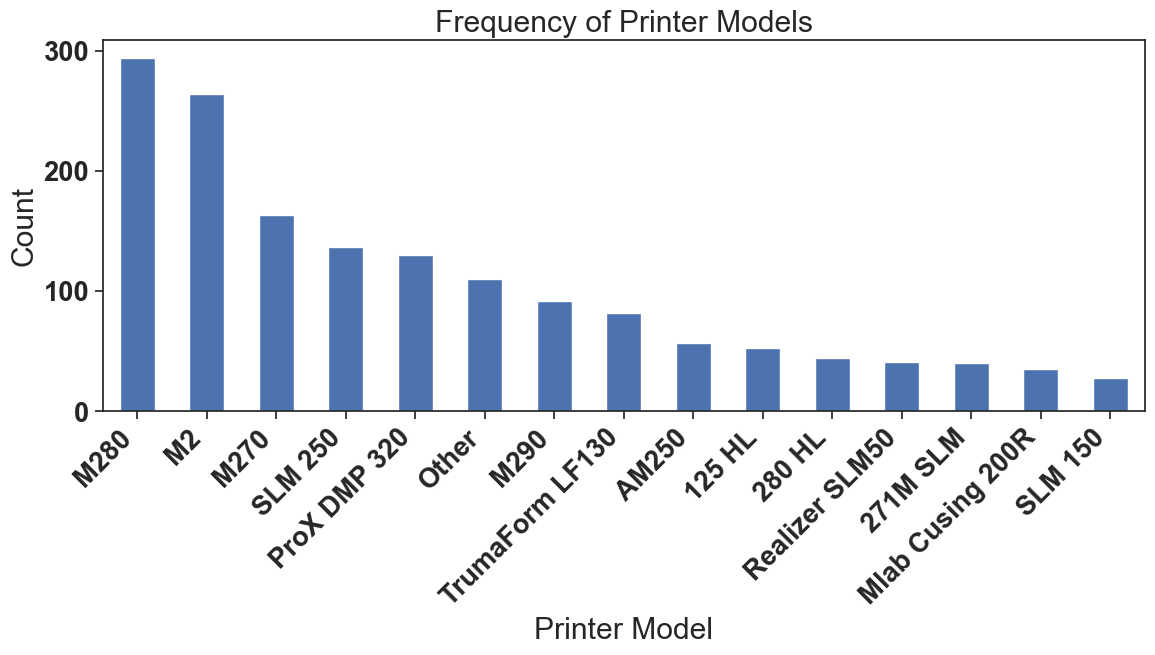

In [22]:
model_counts = df_all['Model'].value_counts().sort_values(ascending=False)

# Plot the top models (adjust number as needed)
plt.figure(figsize=(12, 7))
model_counts.head(15).plot.bar()
plt.title('Frequency of Printer Models')
plt.xlabel('Printer Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

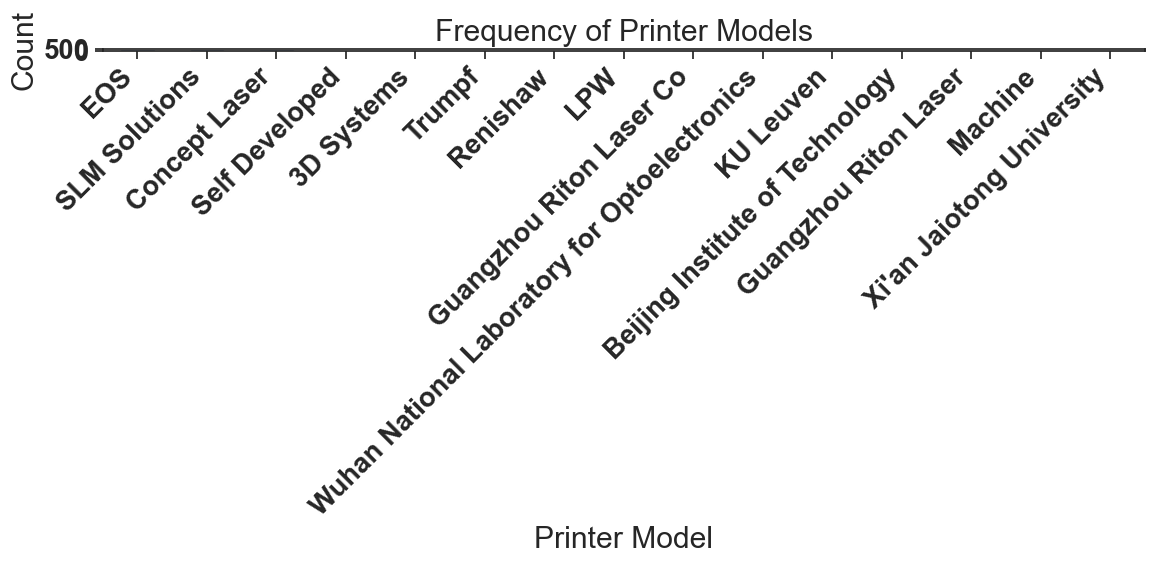

In [23]:
model_counts = df_all['Manufacturer'].value_counts().sort_values(ascending=False)

# Plot the top models (adjust number as needed)
plt.figure(figsize=(12, 6))
model_counts.head(15).plot.bar()
plt.title('Frequency of Printer Models')
plt.xlabel('Printer Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# List of materials of interest
materials = ['316L', 'IN718', 'TI6Al4V', 'AlSi10Mg']

# (Assuming your full DataFrame is in df_all.)
df_subset = df_all.copy()

# Clean column names (remove newlines and extra spaces)
df_subset.columns = df_subset.columns.str.replace('\n', ' ').str.strip()

# Function to assign a printer series based on the model name
def assign_series(model):
    # Check if model is a string before using string methods
    if not isinstance(model, str):
        return "Not Reported"  # Handle NaN or other non-string values
    
    m = model.lower()
    if "eos" in m:
        return "EOS Series"
    elif "prox" in m:  # covers ProX DMP series (also catches "ProX 200")
        return "ProX DMP Series"
    elif "arcam" in m or "ebm a2xx" in m:
        return "Arcam Series"
    elif "realizer" in m:
        return "Realizer Series"
    elif "concept laser" in m:
        return "M Series"
    # If the model starts with "m" (e.g. M280, M270, M2, Mlab Cusing 200R, M1, M3)
    elif m.startswith("m"):
        return "M Series"
    # If it contains "slm" (and hasn't been classified above)
    elif "slm" in m:
        return "SLM Series"
    else:
        return "Not Reported"

# Apply the function to create a new column
df_subset['Series'] = df_subset['Model'].apply(assign_series)
df_subset['Series'].value_counts()

Series
Not Reported       1233
M Series            891
SLM Series          279
ProX DMP Series     149
EOS Series           63
Realizer Series      50
Arcam Series         27
Name: count, dtype: int64

In [25]:
# ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
series_colors = {
    "EOS Series": "#636EFA",
    "SLM Series": "#EF553B",
    "M Series": "#00CC96",
    "ProX DMP Series": "#AB63FA",   
    "Arcam Series": "#FFA15A", 
    "Realizer Series": "#19D3F3",
    "Not Reported": "#999999"
}

zorder_dict = {
    "EOS Series": 1,
    "SLM Series": 2,
    "M Series": 3,
    "ProX DMP Series": 4,
    "Arcam Series": 5,
    "Realizer Series": 6,
    "Not Reported": 0
}

material_markers = {
    '316L': 'o',
    'IN718': '^',
    'TI6Al4V': 's',
    'AlSi10Mg': 'd'
}

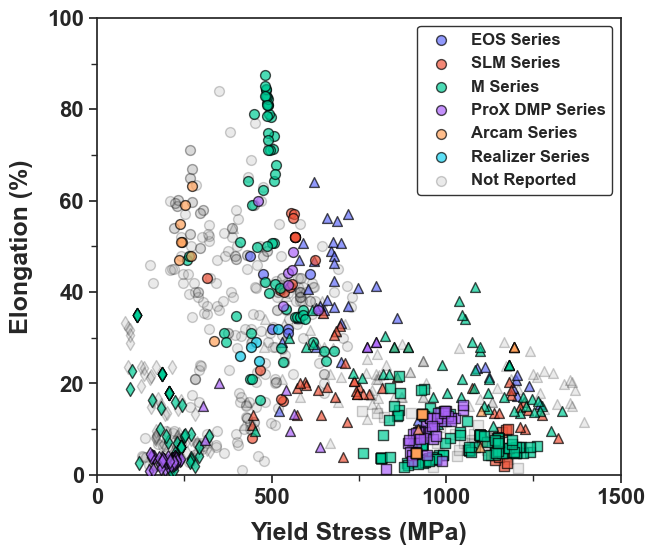

In [26]:
fig, ax = plt.subplots(figsize=(7, 6))
plotted_series = set()

for series, color in series_colors.items():
    for material in materials:
        subset = df_subset[(df_subset['Series'] == series) & (df_subset['Material'] == material)]
        if not subset.empty:
            # Add label only once per series for the legend.
            label = series if series not in plotted_series else None
            plotted_series.add(series)
            
            if series == "Not Reported":
                alpha = 0.2
            else:
                alpha = 0.7
            plt.scatter(subset['Yield Stress (MPa)'], subset['Elongation (%)'],
                        color=color,
                        marker=material_markers[material],
                        s=50,
                        label=label,
                        edgecolor='black',
                        alpha=alpha,
                        zorder=zorder_dict[series])

# Customise plot
ax.set_xlim(0, 1500)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(0, 1500+500, 500))
ax.set_xlabel('Yield Stress (MPa)', labelpad=10, fontsize=18, weight='bold')
ax.set_ylabel('Elongation (%)', labelpad=10, fontsize=18, weight='bold')
ax.legend(fontsize=12, edgecolor='black', loc='best')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))

plt.tight_layout()
plt.show()

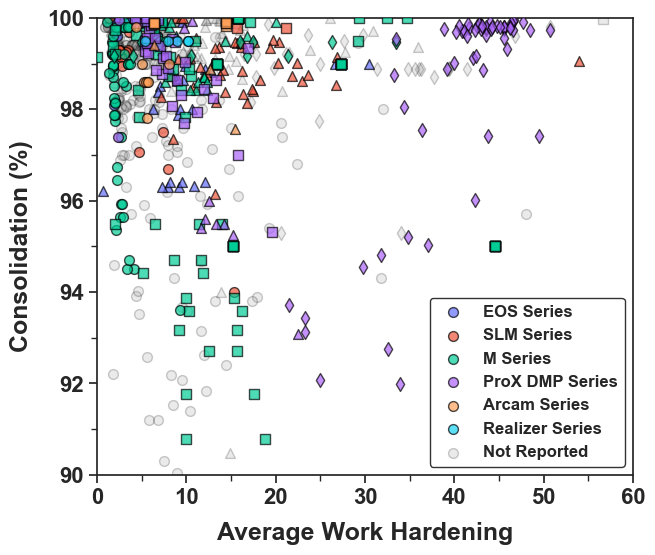

In [27]:
fig, ax = plt.subplots(figsize=(7, 6))
plotted_series = set()

for series, color in series_colors.items():
    for material in materials:
        subset = df_subset[(df_subset['Series'] == series) & (df_subset['Material'] == material)]
        if not subset.empty:
            # Add label only once per series for the legend.
            label = series if series not in plotted_series else None
            plotted_series.add(series)
            
            if series == "Not Reported":
                alpha = 0.2
            else:
                alpha = 0.7
            plt.scatter(subset['Average Work Hardening'], subset['Consolidation (%)'],
                        color=color,
                        marker=material_markers[material],
                        s=50,
                        label=label,
                        edgecolor='black',
                        alpha=alpha,
                        zorder=zorder_dict[series])


# Customise plot
ax.set_xlim(0, 60)
ax.set_ylim(90, 100)
ax.set_yticks(np.arange(90,100+2,2))
ax.set_xlabel('Average Work Hardening', labelpad=10, fontsize=18, weight='bold')
ax.set_ylabel('Consolidation (%)', labelpad=10, fontsize=18, weight='bold')
ax.legend(fontsize=12, edgecolor='black', loc='best')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))

plt.tight_layout()
plt.show()


In [28]:
# Rename
df_subset.rename(columns={"Author's  Last Name": "Author's Last Name"}, inplace=True)
# Get unique authors
unique_authors = df_subset["Author's Last Name"].dropna().unique()
num_authors = len(unique_authors)

# Example colormap: tab20 (has 20 distinct colors)
# If you have more than 20 authors, you can pick a larger colormap or loop it.
colors = plt.cm.tab20(np.linspace(0, 1, num_authors))

# Map each author to a color
author_color_dict = dict(zip(unique_authors, colors))

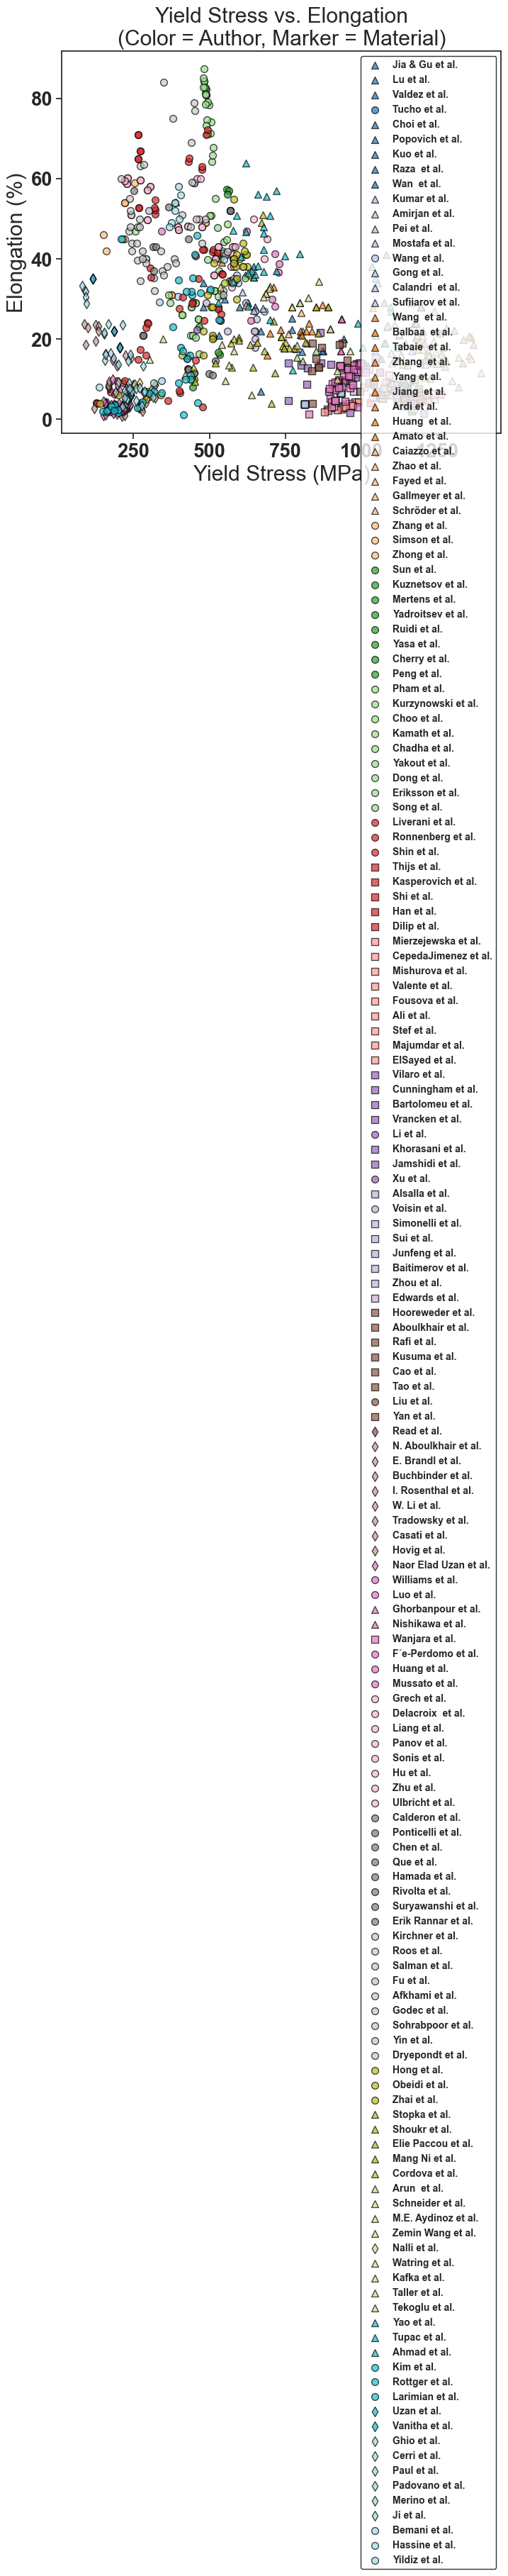

In [29]:
# Plot authors with different colours and materials with different markers
plt.figure(figsize=(8, 7))
plotted_authors = set()

for author in unique_authors:
    for material in materials:
        subset = df_subset[
            (df_subset["Author's Last Name"] == author) &
            (df_subset['Material'] == material)
        ]
        if not subset.empty:
            # Add label only once per author for the legend
            label = f"{author} et al." if author not in plotted_authors else None
            plotted_authors.add(author)
            
            # Optional alpha or other styling
            alpha = 0.7

            plt.scatter(
                subset['Yield Stress (MPa)'],
                subset['Elongation (%)'],
                color=author_color_dict[author],
                marker=material_markers.get(material, 'o'),  # default marker if not in dict
                s=50,
                label=label,
                edgecolor='black',
                alpha=alpha
            )

plt.xlabel('Yield Stress (MPa)')
plt.ylabel('Elongation (%)')
plt.title("Yield Stress vs. Elongation\n(Color = Author, Marker = Material)")

# The legend can get large if you have many authors.
plt.legend(loc='upper right', edgecolor='black', fontsize=10, ncol=1)
plt.tight_layout()
plt.show()


In [30]:
# Suppose your DataFrame is df_subset
author_counts = df_subset["Author's Last Name"].value_counts()

# N top authors to display
N = 20
top_authors = author_counts.index[:N]

# Create a new column 'AuthorGroup' in the DataFrame
# If the author is not in the top 10, label them as "Others"
def group_author(author):
    if author in top_authors:
        return author
    else:
        return "Others"

df_subset['AuthorGroup'] = df_subset["Author's Last Name"].apply(group_author)

In [31]:
unique_author_groups = df_subset['AuthorGroup'].unique()
num_groups = len(unique_author_groups)

colors = plt.cm.tab10(np.linspace(0, 1, num_groups))

author_color_dict = dict(zip(unique_author_groups, colors))

# Fixed list of colours for authors (except "Others")
author_colors_list = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', 
                        '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', 
                        '#FF97FF', '#FECB52']

material_markers = {
    '316L': 'o',
    'IN718': '^',
    'TI6Al4V': 's',
    'AlSi10Mg': 'd'
}

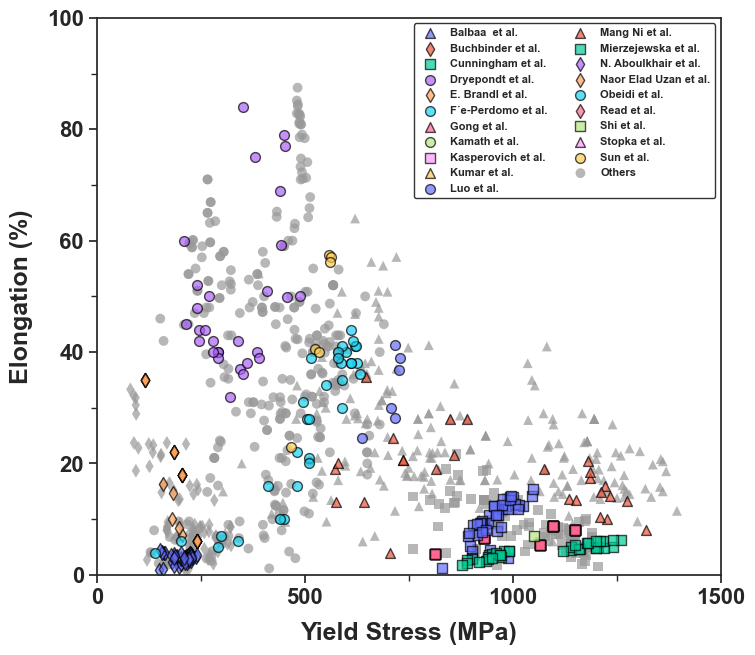

In [32]:
# Get unique author groups from the DataFrame
author_groups = list(df_subset['AuthorGroup'].unique())

# Ensure "Others" is placed last
others_present = "Others" in author_groups
if others_present:
    author_groups.remove("Others")
sorted_author_groups = sorted(author_groups)
if others_present:
    sorted_author_groups.append("Others")

# Create a mapping from author group to colour
author_color_dict = {}
for i, group in enumerate(sorted_author_groups):
    if group == "Others":
        author_color_dict[group] = "#999999"
    else:
        # Cycle through provided colors
        author_color_dict[group] = author_colors_list[i % len(author_colors_list)]

# Plot figure
fig, ax = plt.subplots(figsize=(8, 7))
plotted_authors = set()

# Iterate through the sorted author groups to ensure legend order
for author_group in sorted_author_groups:
    for material in ['316L', 'IN718', 'TI6Al4V', 'AlSi10Mg']:
        subset = df_subset[
            (df_subset['AuthorGroup'] == author_group) & 
            (df_subset['Material'] == material)
        ]
        if not subset.empty:
            # Add label only once per author group for the legend
            label = None if author_group in plotted_authors else (author_group if author_group == "Others" else f"{author_group} et al.")
            plotted_authors.add(author_group)
            
            # Order for z-ordering and styling
            z_order = 0 if author_group == "Others" else 2
            alpha = 0.7 if group != "Not Reported" else 0.3
            edgecolor = 'black' if author_group != "Others" else 'none'
            
            plt.scatter(subset['Yield Stress (MPa)'],
                        subset['Elongation (%)'],
                        color=author_color_dict[author_group],
                        marker=material_markers.get(material, 'o'),
                        s=50,
                        label=label,
                        edgecolor=edgecolor,
                        alpha=alpha,
                        zorder=z_order)

ax.set_xlim(0, 1500)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(0, 1500+500, 500))
ax.set_xlabel('Yield Stress (MPa)', labelpad=10, fontsize=18, weight='bold')
ax.set_ylabel('Elongation (%)', labelpad=10, fontsize=18, weight='bold')
ax.legend(fontsize=8, edgecolor='black', loc='best', ncol=2)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))

plt.tight_layout()
plt.show()

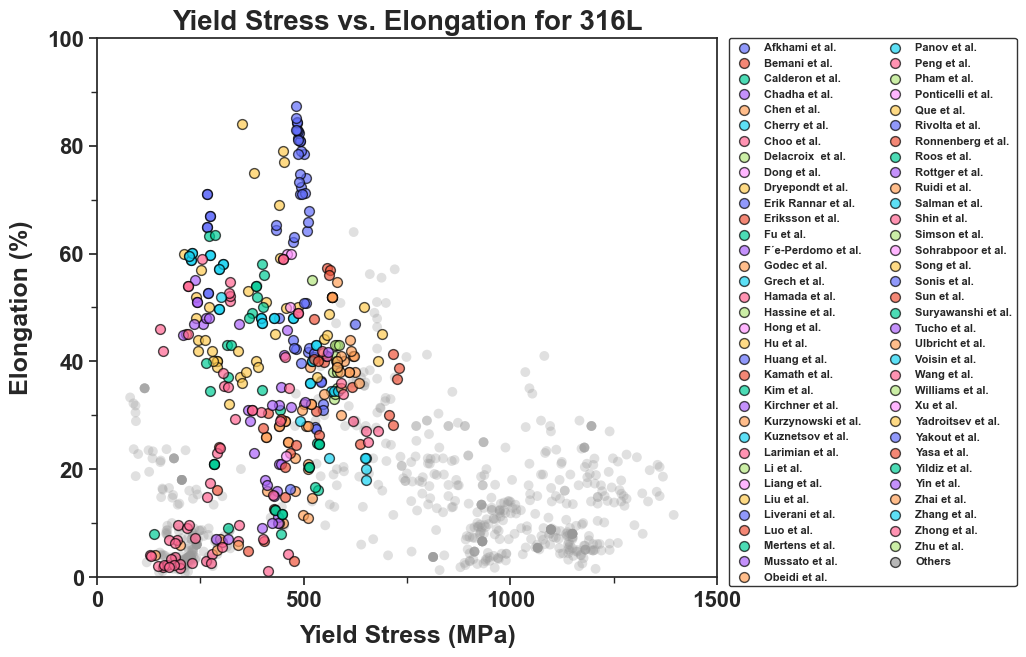

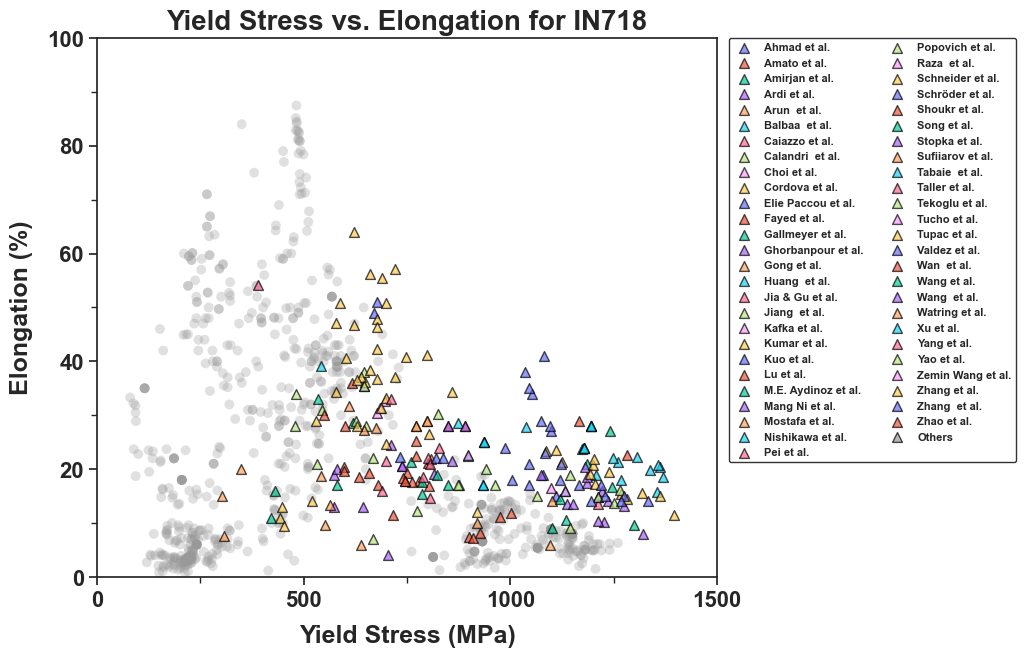

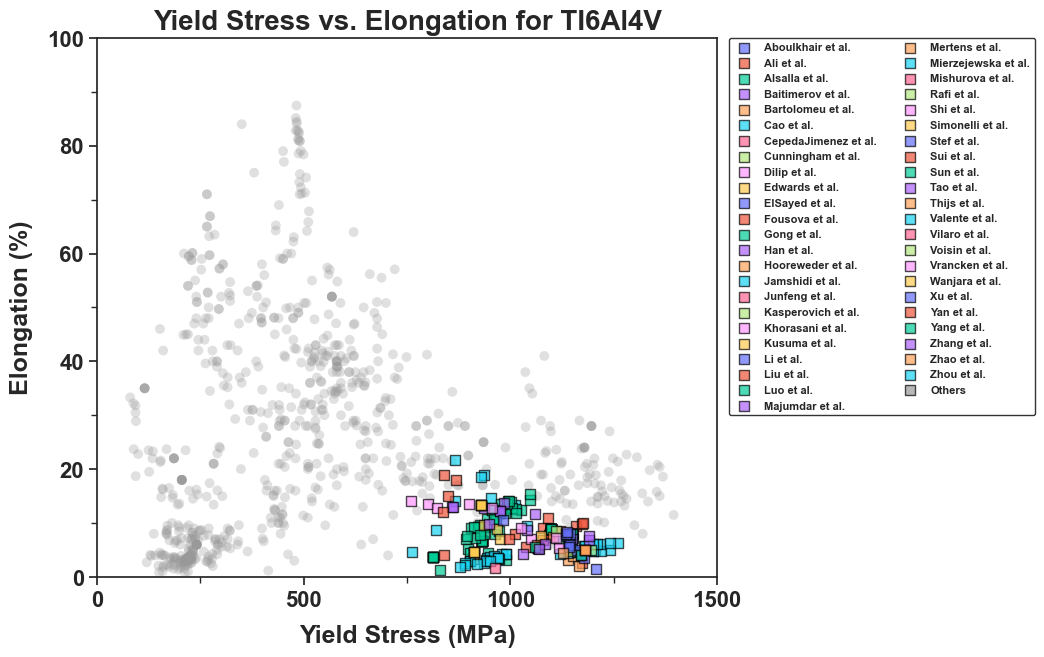

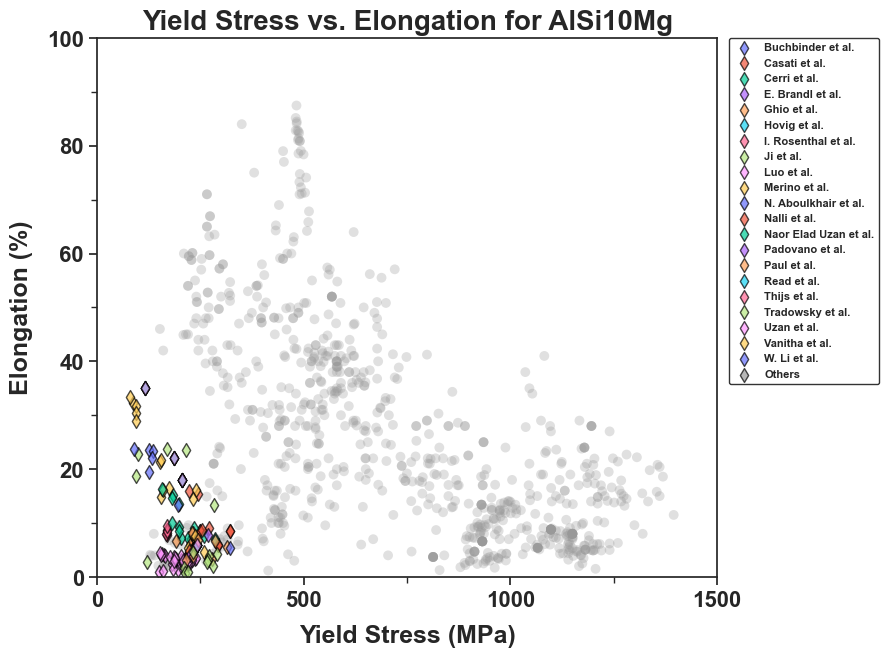

In [33]:
# Plot yield stress vs elongation for each material, with authors grouped by top 10 and others
for material in materials_list:
    # Filter data for the current focused material.
    df_focused = df_subset[df_subset['Material'] == material].copy()
    
    # Also get data for all other materials (to plot in grey)
    df_others = df_subset[df_subset['Material'] != material].copy()
    
    # Calculate frequency counts for the focused material's authors.
    author_counts = df_focused["Author's Last Name"].value_counts()
    top_authors = list(author_counts.index[:])  # top 10 authors
    
    # Create a new column 'TopAuthorGroup' in df_focused:
    # If an author is in top 10, keep their name, otherwise, mark as "Others"
    df_focused['TopAuthorGroup'] = df_focused["Author's Last Name"].apply(
        lambda author: author if author in top_authors else "Others"
    )
    
    # Get unique author groups from the focused subset.
    author_groups = list(df_focused['TopAuthorGroup'].unique())
    
    # Ensure "Others" is placed last in the legend.
    if "Others" in author_groups:
        author_groups.remove("Others")
    sorted_author_groups = sorted(author_groups)
    if "Others" in df_focused['TopAuthorGroup'].unique():
        sorted_author_groups.append("Others")
    
    # Create a mapping from author group to colour
    author_color_dict = {}
    for i, group in enumerate(sorted_author_groups):
        if group == "Others":
            author_color_dict[group] = "#999999"
        else:
            author_color_dict[group] = author_colors_list[i % len(author_colors_list)]
    
    # Create the plot for the current focused material
    fig, ax = plt.subplots(figsize=(8, 7))
    # Plot all data for other materials in grey in the background
    if not df_others.empty:
        ax.scatter(df_others['Yield Stress (MPa)'],
                   df_others['Elongation (%)'],
                   color="#999999",        # grey color for background
                   marker='o',
                   s=50,
                   label="_nolegend_",     # exclude from legend
                   edgecolor='none',
                   alpha=0.3,
                   zorder=0)
    
    # Plot material point by printer group
    plotted_groups = set()
    for group in sorted_author_groups:
        group_subset = df_focused[df_focused['TopAuthorGroup'] == group]
        if not group_subset.empty:
            # Label each group only once for the legend
            if group not in plotted_groups:
                label = f"{group} et al." if group != "Others" else group
            else:
                label = None
            plotted_groups.add(group)
            
            # Order for z-ordering and styling
            z_order = 0 if group == "Others" else 2
            alpha = 0.7 if group != "Not Reported" else 0.3
            
            ax.scatter(group_subset['Yield Stress (MPa)'],
                       group_subset['Elongation (%)'],
                       color=author_color_dict[group],
                       marker=material_markers.get(material, 'o'),
                       s=50,
                       label=label,
                       edgecolor='black',
                       alpha=alpha,
                       zorder=z_order)
    
    ax.set_xlim(0, 1500)
    ax.set_ylim(0, 100)
    ax.set_xticks(np.arange(0, 1500 + 500, 500))
    ax.set_xlabel('Yield Stress (MPa)', labelpad=10, fontsize=18, weight='bold')
    ax.set_ylabel('Elongation (%)', labelpad=10, fontsize=18, weight='bold')
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.tick_params(axis='both', which='major', labelsize=16)
    
    # Add legend with 2 columns
    if material == "AlSi10Mg":
        n = 1
    else:
        n = 2
    ax.legend(fontsize=8, loc='upper left', edgecolor='black', bbox_to_anchor=(1.01, 1.01), ncol=n)
    ax.set_title(f"Yield Stress vs. Elongation for {material}", fontsize=20, weight='bold')
    
    # plt.tight_layout()
    plt.show()


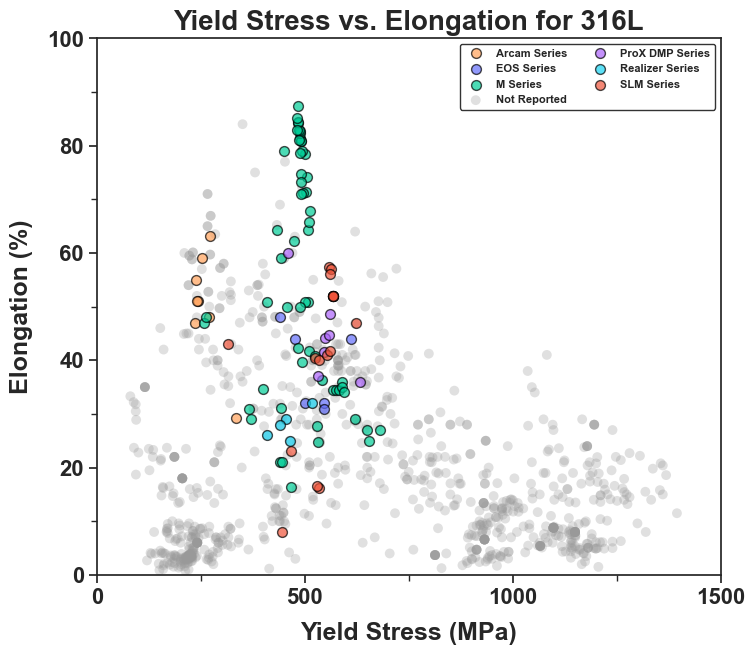

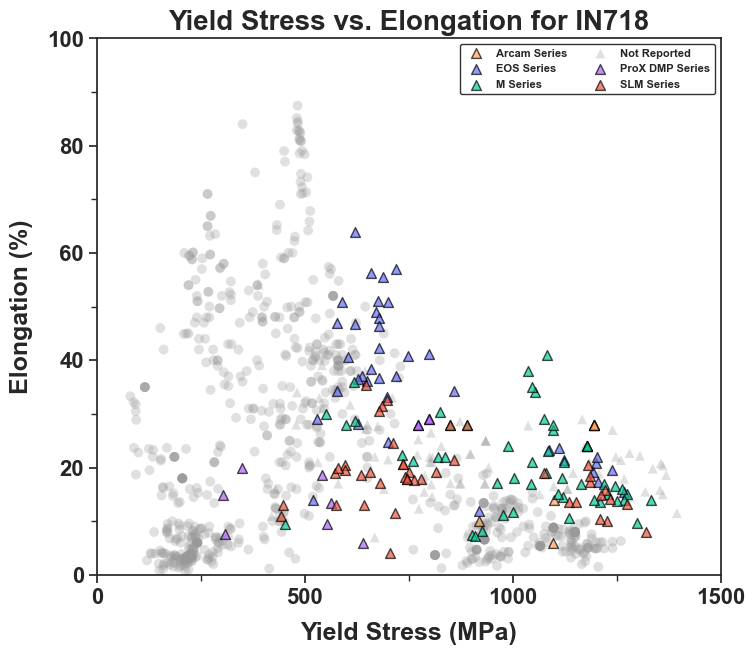

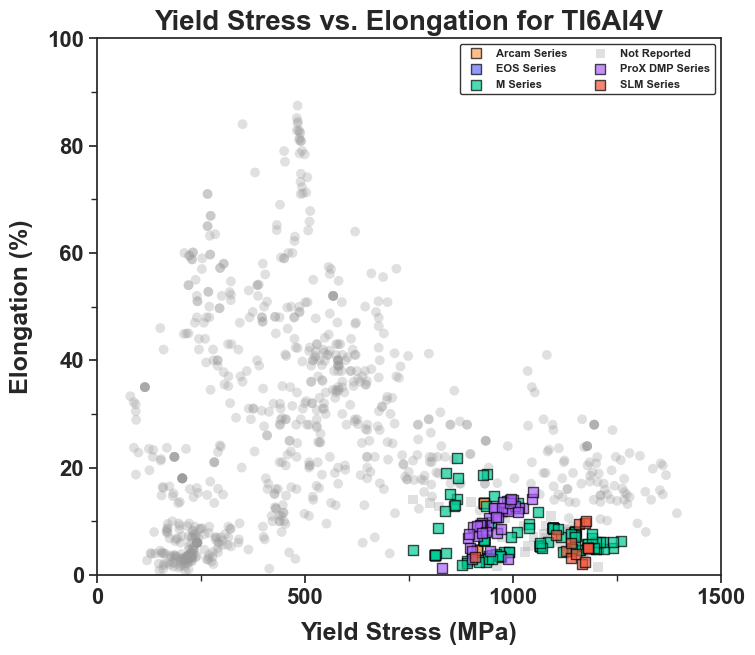

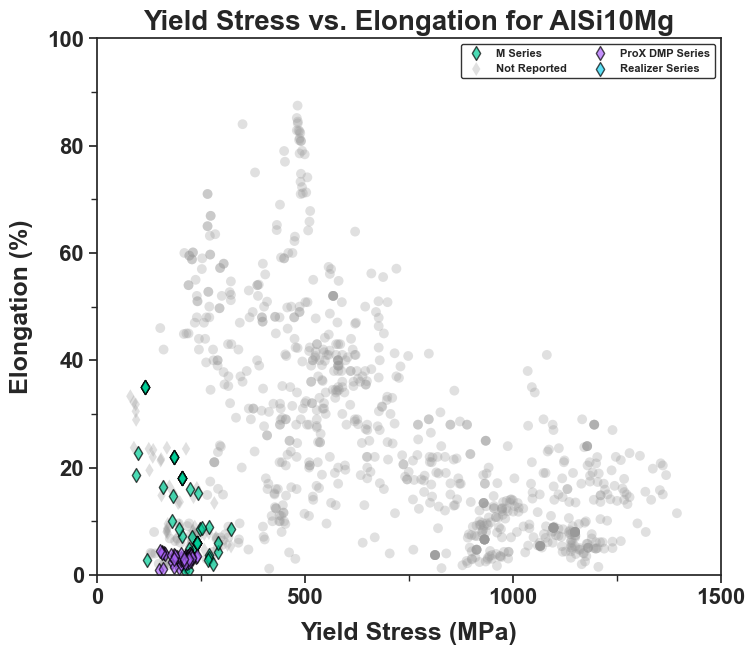

In [34]:
materials_list = ['316L', 'IN718', 'TI6Al4V', 'AlSi10Mg']

for material in materials_list:
    # Filter data for the current focused material
    df_focused = df_subset[df_subset['Material'] == material].copy()
    
    # Get data for all other materials (to plot in grey background)
    df_others = df_subset[df_subset['Material'] != material].copy()
    
    # Calculate frequency counts for printer series within the focused material
    series_counts = df_focused["Series"].value_counts()
    N = None
    top_series = list(series_counts.index[:N])  # top N printers
    
    # Create a new column 'TopPrinterGroup' in df_focused
    # Keep name if top 10 otherwise, mark it as "Others"
    df_focused['TopPrinterGroup'] = df_focused["Series"].apply(
        lambda s: s if s in top_series else "Others"
    )
    
    # Get unique printer groups from the focused subset
    printer_groups = list(df_focused['TopPrinterGroup'].unique())
    
    # Place "Others" last in the legend
    if "Others" in printer_groups:
        printer_groups.remove("Others")
    sorted_printer_groups = sorted(printer_groups)
    if "Others" in df_focused['TopPrinterGroup'].unique():
        sorted_printer_groups.append("Others")
    
    # Create a mapping from printer group to color
    printer_color_dict = {}
    for group in sorted_printer_groups:
        if group == "Others":
            printer_color_dict[group] = "#999999"  # grey for others
        else:
            printer_color_dict[group] = series_colors.get(group, "#000000")  # default to black if missing
    
    # Create the plot for the current focused material
    fig, ax = plt.subplots(figsize=(8, 7))
    # Plot all data for other materials in grey in the background
    if not df_others.empty:
        ax.scatter(df_others['Yield Stress (MPa)'],
                   df_others['Elongation (%)'],
                   color="#999999",  # grey for background points
                   marker='o',
                   s=50,
                   label="_nolegend_",
                   edgecolor='none',
                   alpha=0.3,
                   zorder=0)
    
    # Plot material point by printer group
    plotted_groups = set()
    for group in sorted_printer_groups:
        group_subset = df_focused[df_focused['TopPrinterGroup'] == group]
        if not group_subset.empty:
            # Label each group only once for the legend
            label = f"{group}" if group not in plotted_groups else None
            plotted_groups.add(group)
            
            # Order for z-ordering and styling
            z_order = 0 if group == "Not Reported" else 2
            alpha = 0.7 if group != "Not Reported" else 0.3
            edgecolor = 'black' if group != "Not Reported" else 'none'
            
            ax.scatter(group_subset['Yield Stress (MPa)'],
                       group_subset['Elongation (%)'],
                       color=printer_color_dict[group],
                       marker=material_markers.get(material, 'o'),
                       s=50,
                       label=label,
                       edgecolor=edgecolor,
                       alpha=alpha,
                       zorder=z_order)
    
    ax.set_xlim(0, 1500)
    ax.set_ylim(0, 100)
    ax.set_xticks(np.arange(0, 1500 + 500, 500))
    ax.set_xlabel('Yield Stress (MPa)', labelpad=10, fontsize=18, weight='bold')
    ax.set_ylabel('Elongation (%)', labelpad=10, fontsize=18, weight='bold')
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.tick_params(axis='both', which='major', labelsize=16)
    
    # Add legend with 2 columns; only printer groups for the focused material.
    ax.legend(fontsize=8, edgecolor='black', loc='best', ncol=2)
    ax.set_title(f"Yield Stress vs. Elongation for {material}", fontsize=20, weight='bold')
    
    plt.tight_layout()
    plt.show()


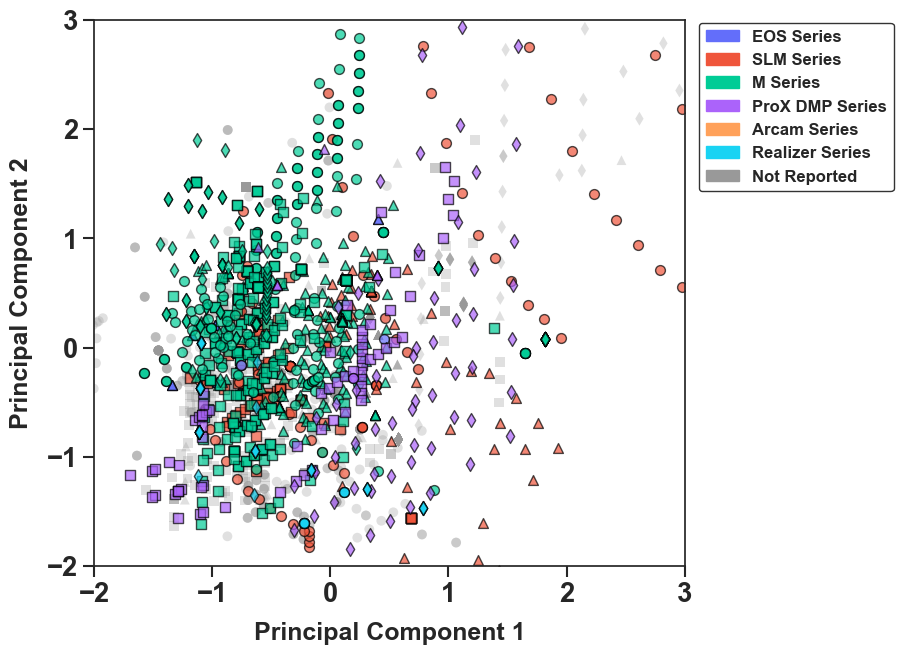

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D   

# Define the process parameter columns (adjust names to match data)
features = ['Laser Power (W)', 'Scanning Speed (mm/s)', 
            'Layer Thickness (um)', 'Hatch Spacing (um)']

# Drop rows with missing values in the selected features
df_features = df_subset[features].dropna().copy()

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results (ensure the index matches df_features)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'], index=df_features.index)

# Merge PCA results with original data (keeping 'Material' and 'Series')
merged_df = pca_df.join(df_subset[['Material', 'Series']])



# Define order for the printer series legend, "Not Reported" is listed last
hue_order = ["EOS Series", "SLM Series", "M Series", 
             "ProX DMP Series", "Arcam Series", "Realizer Series", "Not Reported"]

plt.figure(figsize=(9.5, 7))
ax = plt.gca()

# Loop over the printer series in the specified order
for series in hue_order:
    # Select points for the current printer series.
    df_series = merged_df[merged_df['Series'] == series]
    if df_series.empty:
        continue
    # For each point, choose a marker based on its material.
    for idx, row in df_series.iterrows():
        marker = material_markers.get(row['Material'], 'o')
        # Set zorder, alpha, and edgecolor based on whether the series is "Not Reported"
        z_order = 0 if series == "Not Reported" else 2
        alpha = 0.7 if series != "Not Reported" else 0.3
        edgecolor = 'black' if series != "Not Reported" else 'none'
        
        ax.scatter(row['PCA1'], row['PCA2'], 
                   color=series_colors[series], 
                   marker=marker,
                   s=50,
                   edgecolor=edgecolor,
                   alpha=alpha,
                   zorder=z_order)
        
legend_handles = []
for series in hue_order:
    if series in merged_df['Series'].unique():
        patch = mpatches.Patch(color=series_colors[series], label=series, edgecolor='black', linewidth=1)
        legend_handles.append(patch)

ax.legend(handles=legend_handles, fontsize=12, 
          loc='upper left', edgecolor='black', bbox_to_anchor=(1.01, 1.01))

ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
ax.set_xlabel('Principal Component 1', labelpad=10, fontsize=18, weight='bold')
ax.set_ylabel('Principal Component 2', labelpad=10, fontsize=18, weight='bold')
ax.tick_params(axis='both', which='major', length=8, width=1.5)
plt.tight_layout()

# plt.savefig(f'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper - Revision/Figures/Revision/PCA_Printer', dpi=300, bbox_inches='tight')
plt.show()

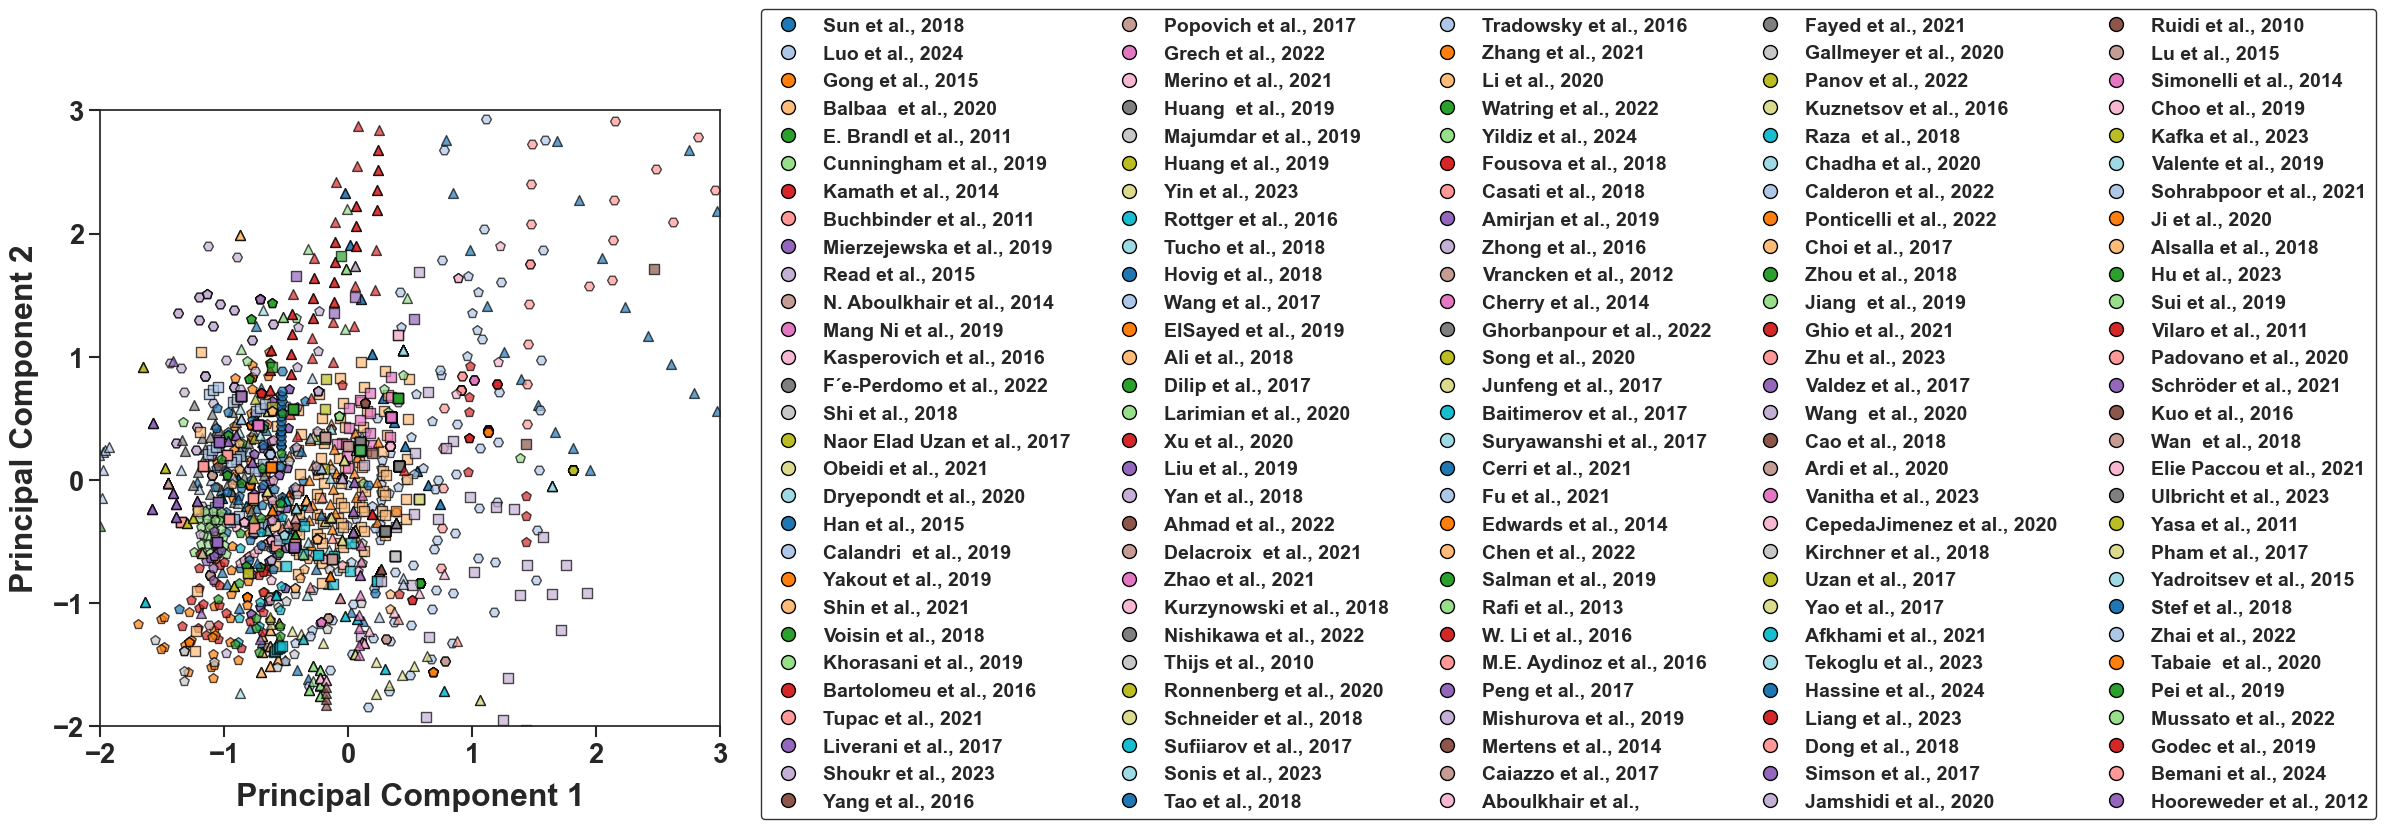

In [ ]:
# Ensure your DataFrame (df_subset) contains the columns:
# - Process parameters: 'Laser Power (W)', 'Scanning Speed (mm/s)', 'Layer Thickness (um)', 'Hatch Spacing (um)'
# - 'Material', 'Series', and "Author's Last Name"
# Rename the author column to avoid special characters:
df_subset = df_subset.rename(columns={"Author's Last Name": "Author_Last_Name"})

# Define the process parameter columns
features = ['Laser Power (W)', 'Scanning Speed (mm/s)', 
            'Layer Thickness (um)', 'Hatch Spacing (um)']

# Drop rows with missing values in the selected features
df_features = df_subset[features].dropna().copy()

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results (ensure the index matches df_features)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'], index=df_features.index)

# Merge PCA results with original data (keeping 'Material', 'Series', and 'Author_Last_Name')
merged_df = pca_df.join(df_subset[['Material', 'Series', 'Author_Last_Name']])



# Create Top Author Grouping and Define Color & Marker Mappings
# Determine the top 20 authors by frequency
N = None
top_authors = df_subset["Author_Last_Name"].value_counts().index[:N].tolist()

# Create column 'TopAuthor' if the author is in the top N, keep it,otherwise, label as "Others"
merged_df["TopAuthor"] = merged_df["Author_Last_Name"].apply(lambda x: x if x in top_authors else "Others")

# Define order, top authors (in order of frequency) then "Others" at the end
desired_order = top_authors + ["Others"]

# Colour mapping for top authors
colors_top = sns.color_palette("tab20", len(top_authors))
author_color_dict = {}
for i, author in enumerate(desired_order):
    if author == "Others":
        author_color_dict[author] = "#999999"  # Gray for Others.
    else:
        author_color_dict[author] = colors_top[i]

# Define mapping for material markers (these won't appear in the legend)
material_markers = {
    '316L': '^',
    'IN718': 's',
    'TI6Al4V': 'p',
    'AlSi10Mg': 'H'
}



# PCA plot coloured by Top Author and Marked by Material
plt.figure(figsize=(8, 8))
ax = plt.gca()

# Loop over the authors in the desired order
for author in desired_order:
    df_author = merged_df[merged_df["TopAuthor"] == author]
    if df_author.empty:
        continue
    # For each point, choose a marker based on its Material.
    for idx, row in df_author.iterrows():
        marker = material_markers.get(row["Material"], 'o')
        # Set zorder, alpha, and edgecolor based on whether the author is "Others"
        z_order = 0 if author == "Others" else 2
        alpha = 0.7 if author != "Others" else 0.3
        edgecolor = "black" if author != "Others" else "none"
        
        ax.scatter(row["PCA1"], row["PCA2"], 
                   color=author_color_dict[author],
                   marker=marker,
                   s=50,
                   edgecolor=edgecolor,
                   alpha=alpha,
                   zorder=z_order)


# Create a dictionary mapping each author to their most frequent year
author_year = df_subset.groupby("Author_Last_Name")["Year"].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
).to_dict()

# Create custom legend entries for TopAuthor
legend_handles = []
for author in desired_order:
    if author in merged_df["TopAuthor"].unique():
        # Append 'et al., year' if the author is not "Others"
        if author != "Others":
            year = author_year.get(author, "NA")
            # Convert the year to integer if it's a number
            year_int = int(year) if pd.notnull(year) else ""
            label = f"{author} et al., {year_int}"
        else:
            label = "Others"
        handle = Line2D([0], [0],
                        marker='o',
                        color='none',
                        markerfacecolor=author_color_dict[author],
                        markeredgecolor='black',
                        markersize=10,
                        label=label)
        legend_handles.append(handle)

# ax.legend(handles=legend_handles, fontsize=9.5, 
#           loc='upper left', edgecolor='black', bbox_to_anchor=(1.01, 1.01), ncol=5)

ax.legend(handles=legend_handles, fontsize=14, 
          loc='upper left', edgecolor='black', 
          bbox_to_anchor=(1.05, 1.21-0.03), ncol=5)

# Set axis limits (adjust as needed)
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
ax.set_xlabel('Principal Component 1', labelpad=10, fontsize=18+5, weight='bold')
ax.set_ylabel('Principal Component 2', labelpad=10, fontsize=18+5, weight='bold')
ax.tick_params(axis='both', which='major', length=8, width=1.5)
plt.tight_layout()

# plt.savefig(f'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper - Revision/Figures/Revision/PCA_Author', dpi=300, bbox_inches='tight')
plt.show()

### ANOVA Test for Printer Effect

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Rename the column to avoid special characters
df_subset = df_subset.rename(columns={"Author's Last Name": "Author_Last_Name"})

# Define the properties and their labels.
properties = [
    ("Yield Stress (MPa)", "Yield Stress"),
    ("Elongation (%)", "Elongation"),
    ("Average Work Hardening", "Average Work Hardening"),
    ("Consolidation (%)", "Consolidation")
]

In [38]:
# Only analyse for top 3 most used printer manufacturers
top_printers = df_subset['Manufacturer'].value_counts().index[:3]
# Filter the DataFrame for the top printer manufacturers
df_subset_top_printers = df_subset[df_subset['Manufacturer'].isin(top_printers)].copy()
df_subset_top_printers

Material Author_Last_Name    Year  \
4        IN718               Lu  2015.0   
5        IN718               Lu  2015.0   
6        IN718               Lu  2015.0   
7        IN718               Lu  2015.0   
8        IN718           Valdez  2017.0   
...        ...              ...     ...   
4319  AlSi10Mg          Vanitha  2023.0   
4320  AlSi10Mg          Vanitha  2023.0   
4321  AlSi10Mg          Vanitha  2023.0   
4322  AlSi10Mg          Vanitha  2023.0   
4323  AlSi10Mg          Vanitha  2023.0   

                                          Link to paper   Manufacturer Model  \
4     https://www.sciencedirect.com/science/article/...  SLM Solutions   NaN   
5     https://www.sciencedirect.com/science/article/...  SLM Solutions   NaN   
6     https://www.sciencedirect.com/science/article/...  SLM Solutions   NaN   
7     https://www.sciencedirect.com/science/article/...  SLM Solutions   NaN   
8     https://www.sciencedirect.com/science/article/...            EOS  M270   
...                                                 ...            ...   ...   
4319         https://doi.org/10.1007/s11665-023-09083-x            EOS   NaN   
4320         https://doi.org/10.1007/s11665-023-09083-x            EOS   NaN   
4321         https://doi.org/10.1007/s11665-023-09083-x            EOS   NaN   
4322         https://doi.org/10.1007/s11665-023-09083-x            EOS   NaN   
4323         https://doi.org/10.1007/s11665-023-09083-x            EOS   NaN   

     Printing Method Method Powder Size  Distribution (μm)  Laser Power (W)  \
4               LPBF    NaN                            NaN            180.0   
5               LPBF    NaN                            NaN            180.0   
6               LPBF    NaN                            NaN            180.0   
7               LPBF    NaN                            NaN            180.0   
8               LPBF    NaN                            NaN            195.0   
...              ...    ...                            ...              ...   
4319            LPBF    NaN                            NaN            370.0   
4320            LPBF    NaN                            NaN            370.0   
4321            LPBF    NaN                            NaN            370.0   
4322            LPBF    NaN                            NaN            370.0   
4323            LPBF    NaN                            NaN            370.0   

      ...  Max Stress/Strain  R value  Fatigue Life (Cycles)  \
4     ...                NaN      NaN                    NaN   
5     ...                NaN      NaN                    NaN   
6     ...                NaN      NaN                    NaN   
7     ...                NaN      NaN                    NaN   
8     ...                NaN      NaN                    NaN   
...   ...                ...      ...                    ...   
4319  ...                NaN      NaN                    NaN   
4320  ...                NaN      NaN                    NaN   
4321  ...                NaN      NaN                    NaN   
4322  ...                NaN      NaN                    NaN   
4323  ...                NaN      NaN                    NaN   

      Test Temerature (℃).2  Average Work Hardening  Surface Roughness (μm)  \
4                       NaN               16.172107                     NaN   
5                       NaN               13.040380                     NaN   
6                       NaN               13.154362                     NaN   
7                       NaN               11.584158                     NaN   
8                       NaN                     NaN                     NaN   
...                     ...                     ...                     ...   
4319                    NaN                     NaN                     NaN   
4320                    NaN                     NaN                     NaN   
4321                    NaN                     NaN                     NaN   
4322                

In [39]:
# Group the DataFrame by material type
for material, df_material in df_subset_top_printers.groupby('Material'):
    print(f"--- Analysis for Material: {material} ---\n")
    # Loop over each property and perform ANOVA for this material subset
    for prop, prop_name in properties:
        model_effect = ols(f'Q("{prop}") ~ C(Model)', data=df_material).fit()
        anova_effect = sm.stats.anova_lm(model_effect, typ=2)
        print(f"{prop_name} ANOVA (Printer Model Effect) for Material '{material}':")
        print(anova_effect)
        p_val = anova_effect.loc["C(Model)", "PR(>F)"]
        if p_val < 0.05:
            print(f"\nPrinter model has a significant effect on {prop_name} for material '{material}'.\n")
        else:
            print(f"\nPrinter model does not have a significant effect on {prop_name} for material '{material}'.\n")


--- Analysis for Material: 316L ---

Yield Stress ANOVA (Printer Model Effect) for Material '316L':
                 sum_sq    df         F        PR(>F)
C(Model)  231022.517061   9.0  8.029221  8.553974e-07
Residual  185424.191198  58.0       NaN           NaN

Printer model has a significant effect on Yield Stress for material '316L'.

Elongation ANOVA (Printer Model Effect) for Material '316L':
                sum_sq    df          F        PR(>F)
C(Model)  53408.681519   9.0  36.008626  1.309005e-24
Residual  14502.586747  88.0        NaN           NaN

Printer model has a significant effect on Elongation for material '316L'.

Average Work Hardening ANOVA (Printer Model Effect) for Material '316L':
              sum_sq    df          F        PR(>F)
C(Model)  299.193459   9.0  16.008643  9.756818e-11
Residual  101.753919  49.0        NaN           NaN

Printer model has a significant effect on Average Work Hardening for material '316L'.

Consolidation ANOVA (Printer Model Effect) f

In [40]:
# Printer Model Effect on Properties
for prop, prop_name in properties:
    model_effect = ols(f'Q("{prop}") ~ C(Model)', data=df_subset_top_printers).fit()
    anova_effect = sm.stats.anova_lm(model_effect, typ=2)
    print(f"{prop_name} ANOVA (Printer Model Effect):")
    print(anova_effect)
    p_val = anova_effect.loc["C(Model)", "PR(>F)"]
    if p_val < 0.05:
         print(f"\nPrinter model has a significant effect on {prop_name}.\n")
    else:
         print(f"\nPrinter model does not have a significant effect on {prop_name}.\n")


Yield Stress ANOVA (Printer Model Effect):
                sum_sq     df           F         PR(>F)
C(Model)  3.150174e+08   26.0  130.755286  2.571096e-156
Residual  3.409964e+07  368.0         NaN            NaN

Printer model has a significant effect on Yield Stress.

Elongation ANOVA (Printer Model Effect):
                 sum_sq     df         F    PR(>F)
C(Model)   23285.513972   26.0  2.893909  0.000018
Residual  126266.397383  408.0       NaN       NaN

Printer model has a significant effect on Elongation.

Average Work Hardening ANOVA (Printer Model Effect):
                sum_sq     df          F        PR(>F)
C(Model)  90951.128941   26.0  36.434635  1.740246e-74
Residual  33123.743903  345.0        NaN           NaN

Printer model has a significant effect on Average Work Hardening.

Consolidation ANOVA (Printer Model Effect):
                sum_sq     df         F        PR(>F)
C(Model)   2085.163302   26.0  3.135696  6.808457e-07
Residual  25064.490269  980.0       NaN 

In [41]:
# Author Effect on Properties

# Group authors: keep top N amount of authors, label the rest as "Others"
top_authors = df_subset["Author_Last_Name"].value_counts().index[:].tolist()
df_subset["Author_Group"] = df_subset["Author_Last_Name"].apply(lambda x: x if x in top_authors else "Others")

for prop, prop_name in properties:
    model_author_effect = ols(f'Q("{prop}") ~ C(Author_Group)', data=df_subset).fit()
    anova_author_effect = sm.stats.anova_lm(model_author_effect, typ=2)
    print(f"{prop_name} ANOVA (Author Effect):")
    print(anova_author_effect)
    p_val_author = anova_author_effect.loc["C(Author_Group)", "PR(>F)"]
    if p_val_author < 0.05:
         print(f"\nAuthor group has a significant effect on {prop_name}.\n")
    else:
         print(f"\nAuthor group does not have a significant effect on {prop_name}.\n")

Yield Stress ANOVA (Author Effect):
                       sum_sq     df         F    PR(>F)
C(Author_Group)  1.084265e+06  169.0  0.221758  0.637808
Residual         2.849738e+07  985.0       NaN       NaN

Author group does not have a significant effect on Yield Stress.

Elongation ANOVA (Author Effect):
                      sum_sq     df         F    PR(>F)
C(Author_Group)  12207.85284  169.0  0.769082  0.380714
Residual         92797.62385  988.0       NaN       NaN

Author group does not have a significant effect on Elongation.

Average Work Hardening ANOVA (Author Effect):
                       sum_sq     df         F    PR(>F)
C(Author_Group)  12859.015627  169.0  0.826628  0.363501
Residual         80265.220685  872.0       NaN       NaN

Author group does not have a significant effect on Average Work Hardening.

Consolidation ANOVA (Author Effect):
                       sum_sq      df         F    PR(>F)
C(Author_Group)  40512.997146   169.0  9.758399  0.001813
Residual    